In [ ]:
import numpy as np

inputs = np.load('initial_inputs.npy')
outputs = np.load('initial_outputs.npy')

print("Inputs shape:", inputs.shape)
print("Outputs shape:", outputs.shape)
print("Sample inputs:", inputs[:5])
print("Sample outputs:", outputs[:5])

FileNotFoundError: [Errno 2] No such file or directory: 'initial_inputs.npy'

In [ ]:
with open('queries.txt', 'r') as file:
    previous_submission = file.read()
print(previous_submission)

In [ ]:
import numpy as np

best_vec = np.array([0.768771, 0.105777])
delta = 0.05  # adjust the magnitude based on sensitivity

# Create several candidates by perturbing each component:
candidate1 = best_vec.copy(); candidate1[0] += delta
candidate2 = best_vec.copy(); candidate2[0] -= delta
candidate3 = best_vec.copy(); candidate3[1] += delta
candidate4 = best_vec.copy(); candidate4[1] -= delta
candidate5 = best_vec + np.array([delta, delta])
candidate6 = best_vec - np.array([delta, delta])

print("Candidate 1:", candidate1)
print("Candidate 2:", candidate2)
print("Candidate 3:", candidate3)
print("Candidate 4:", candidate4)
print("Candidate 5:", candidate5)
print("Candidate 6:", candidate6)

In [ ]:
import numpy as np

def generate_candidates(best_vec, delta=0.05):
    """
    Given a best query vector and a delta,
    this function returns a dictionary of candidate vectors
    generated by perturbing each element.
    """
    candidates = {}
    # Perturb the first element
    candidate1 = best_vec.copy()
    candidate1[0] += delta

    candidate2 = best_vec.copy()
    candidate2[0] -= delta

    # If the vector is at least 2D, perturb the second element
    candidate3 = best_vec.copy()
    if best_vec.size > 1:
        candidate3[1] += delta

    candidate4 = best_vec.copy()
    if best_vec.size > 1:
        candidate4[1] -= delta

    # Perturb all elements together
    candidate5 = best_vec + np.full(best_vec.shape, delta)
    candidate6 = best_vec - np.full(best_vec.shape, delta)

    candidates['candidate1'] = candidate1
    candidates['candidate2'] = candidate2
    candidates['candidate3'] = candidate3
    candidates['candidate4'] = candidate4
    candidates['candidate5'] = candidate5
    candidates['candidate6'] = candidate6
    return candidates

# Example for Function 3 (3-dimensional)
best_vec_func3 = np.array([0.1656, 0.964454, 0.658992])
candidates_func3 = generate_candidates(best_vec_func3, delta=0.05)

print("New candidate vectors for Function 3:")
for name, vec in candidates_func3.items():
    print(f"{name}: {vec}")

In [ ]:
import numpy as np

def generate_candidates(best_vec, delta=0.05):
    """
    Generate candidate vectors by perturbing each dimension of best_vec.
    For an n-dimensional vector, this function creates:
      - Two candidates per dimension (one with +delta, one with -delta)
      - Two candidates with all dimensions perturbed (all +delta and all -delta)
    Total candidates = 2*n + 2.
    """
    candidates = {}
    n = best_vec.size
    for i in range(n):
        candidate_plus = best_vec.copy()
        candidate_plus[i] += delta
        candidate_minus = best_vec.copy()
        candidate_minus[i] -= delta
        candidates[f'candidate_plus_dim_{i+1}'] = candidate_plus
        candidates[f'candidate_minus_dim_{i+1}'] = candidate_minus

    candidate_all_plus = best_vec + np.full(best_vec.shape, delta)
    candidate_all_minus = best_vec - np.full(best_vec.shape, delta)
    candidates['candidate_all_plus'] = candidate_all_plus
    candidates['candidate_all_minus'] = candidate_all_minus

    return candidates

def format_candidate(candidate):
    """
    Formats a candidate vector into the required submission string:
    x1-x2-...-xn, where each number has 6 decimal places.
    """
    return "-".join([f"{x:.6f}" for x in candidate])

# Example for a 3-dimensional function (e.g., Function 3)
best_vec_func3 = np.array([0.165600, 0.964454, 0.658992])
candidates_func3 = generate_candidates(best_vec_func3, delta=0.05)

print("Formatted candidate vectors for Function 3:")
for name, vec in candidates_func3.items():
    print(f"{name}: {format_candidate(vec)}")

Formatted candidate vectors for Function 3:
candidate_plus_dim_1: 0.215600-0.964454-0.658992
candidate_minus_dim_1: 0.115600-0.964454-0.658992
candidate_plus_dim_2: 0.165600-1.014454-0.658992
candidate_minus_dim_2: 0.165600-0.914454-0.658992
candidate_plus_dim_3: 0.165600-0.964454-0.708992
candidate_minus_dim_3: 0.165600-0.964454-0.608992
candidate_all_plus: 0.215600-1.014454-0.708992
candidate_all_minus: 0.115600-0.914454-0.608992


In [ ]:
import numpy as np

# Our current chosen candidate for Function 2 is Candidate 1: [0.818771, 0.105777]
best_vec_func2 = np.array([0.818771, 0.105777])

# Format this vector in the required dash-separated format (6 decimal places)
def format_candidate(candidate):
    return "-".join([f"{x:.6f}" for x in candidate])

formatted_candidate = format_candidate(best_vec_func2)
print("Best Candidate for Function 2 (to submit):", formatted_candidate)

# Create a simple log (dictionary) to record submissions and feedback.
submission_log = {"Function 2": {"candidate": best_vec_func2, "formatted": formatted_candidate, "feedback": None}}
print("Submission Log:", submission_log)

Best Candidate for Function 2 (to submit): 0.818771-0.105777
Submission Log: {'Function 2': {'candidate': array([0.818771, 0.105777]), 'formatted': '0.818771-0.105777', 'feedback': None}}


In [ ]:
def generate_candidates(best_vec, delta=0.05):
    """
    Generate candidate vectors by perturbing each dimension individually,
    plus candidates with all dimensions perturbed.
    For a 2-D vector, this will give us 2*2 + 2 = 6 candidates.
    """
    candidates = {}
    # Perturb each dimension individually
    candidate1 = best_vec.copy(); candidate1[0] += delta
    candidate2 = best_vec.copy(); candidate2[0] -= delta
    candidate3 = best_vec.copy(); candidate3[1] += delta
    candidate4 = best_vec.copy(); candidate4[1] -= delta
    # Perturb both dimensions together
    candidate5 = best_vec + np.full(best_vec.shape, delta)
    candidate6 = best_vec - np.full(best_vec.shape, delta)

    candidates['candidate1'] = candidate1
    candidates['candidate2'] = candidate2
    candidates['candidate3'] = candidate3
    candidates['candidate4'] = candidate4
    candidates['candidate5'] = candidate5
    candidates['candidate6'] = candidate6
    return candidates

candidates_func2 = generate_candidates(best_vec_func2, delta=0.05)

print("New Candidate Vectors for Function 2:")
for name, vec in candidates_func2.items():
    print(f"{name}: {format_candidate(vec)}")

New Candidate Vectors for Function 2:
candidate1: 0.868771-0.105777
candidate2: 0.768771-0.105777
candidate3: 0.818771-0.155777
candidate4: 0.818771-0.055777
candidate5: 0.868771-0.155777
candidate6: 0.768771-0.055777


In [ ]:
# Initialize a log dictionary for tracking submissions and feedback for Function 2
submission_log = {"Function 2": []}

# Helper function to format a candidate vector as required (dash-separated, 6 decimal places)
def format_candidate(candidate):
    return "-".join([f"{x:.6f}" for x in candidate])

# Define your initial best candidate for Function 2 (we're starting with [0.768771, 0.105777])
best_vec_func2 = np.array([0.768771, 0.105777])
formatted_candidate = format_candidate(best_vec_func2)
print("Initial Best Candidate for Function 2 (to submit):", formatted_candidate)

# Log this candidate (feedback will be filled in later)
submission_log["Function 2"].append({
    "candidate": best_vec_func2,
    "formatted": formatted_candidate,
    "feedback": None,  # To update when you receive feedback
    "date": "2025-04-01"  # Use the current date or your submission date
})

print("Submission Log:", submission_log)

Initial Best Candidate for Function 2 (to submit): 0.768771-0.105777
Submission Log: {'Function 2': [{'candidate': array([0.768771, 0.105777]), 'formatted': '0.768771-0.105777', 'feedback': None, 'date': '2025-04-01'}]}


In [ ]:
def generate_candidates(best_vec, delta=0.05):
    """
    Generate candidate vectors by perturbing each dimension individually,
    plus candidates with all dimensions perturbed.
    For a 2-D vector, this gives 2*2 + 2 = 6 candidates.
    """
    candidates = {}
    # Perturb each dimension individually
    candidate1 = best_vec.copy(); candidate1[0] += delta
    candidate2 = best_vec.copy(); candidate2[0] -= delta
    candidate3 = best_vec.copy(); candidate3[1] += delta
    candidate4 = best_vec.copy(); candidate4[1] -= delta
    # Perturb both dimensions together
    candidate5 = best_vec + np.full(best_vec.shape, delta)
    candidate6 = best_vec - np.full(best_vec.shape, delta)

    candidates['candidate1'] = candidate1
    candidates['candidate2'] = candidate2
    candidates['candidate3'] = candidate3
    candidates['candidate4'] = candidate4
    candidates['candidate5'] = candidate5
    candidates['candidate6'] = candidate6
    return candidates

# Generate candidates for Function 2 using our current best vector
candidates_func2 = generate_candidates(best_vec_func2, delta=0.05)

print("New Candidate Vectors for Function 2:")
for name, vec in candidates_func2.items():
    print(f"{name}: {format_candidate(vec)}")

New Candidate Vectors for Function 2:
candidate1: 0.818771-0.105777
candidate2: 0.718771-0.105777
candidate3: 0.768771-0.155777
candidate4: 0.768771-0.055777
candidate5: 0.818771-0.155777
candidate6: 0.718771-0.055777


In [ ]:
def generate_random_candidate(dim, low=0.0, high=1.0):
    return np.random.uniform(low, high, size=dim)

# For Function 2 (2-D), generate two random candidates
random_candidate1 = generate_random_candidate(2, low=0.0, high=1.0)
random_candidate2 = generate_random_candidate(2, low=0.0, high=1.0)

print("Random Candidate 1:", format_candidate(random_candidate1))
print("Random Candidate 2:", format_candidate(random_candidate2))

Random Candidate 1: 0.149413-0.257681
Random Candidate 2: 0.099497-0.287954


In [ ]:
import numpy as np

# Load your initial input and output files
inputs = np.load('initial_inputs.npy')
outputs = np.load('initial_outputs.npy')

# Print out shapes and some sample data
print("Inputs shape:", inputs.shape)
print("Outputs shape:", outputs.shape)
print("Sample inputs:", inputs[:5])
print("Sample outputs:", outputs[:5])

FileNotFoundError: [Errno 2] No such file or directory: 'initial_inputs.npy'

In [ ]:
import numpy as np

# Helper functions (if not already defined)
def format_candidate(candidate):
    """Formats a candidate vector into a dash-separated string with 6 decimal places."""
    return "-".join([f"{x:.6f}" for x in candidate])

def generate_candidates(best_vec, delta=0.05):
    """
    Generate candidate vectors by perturbing each dimension individually,
    plus candidates with all dimensions perturbed.
    Total candidates = 2*n + 2.
    """
    candidates = {}
    n = best_vec.size
    for i in range(n):
        candidate_plus = best_vec.copy()
        candidate_plus[i] += delta
        candidate_minus = best_vec.copy()
        candidate_minus[i] -= delta
        candidates[f'candidate_plus_dim_{i+1}'] = candidate_plus
        candidates[f'candidate_minus_dim_{i+1}'] = candidate_minus
    candidate_all_plus = best_vec + np.full(best_vec.shape, delta)
    candidate_all_minus = best_vec - np.full(best_vec.shape, delta)
    candidates['candidate_all_plus'] = candidate_all_plus
    candidates['candidate_all_minus'] = candidate_all_minus
    return candidates

# Best vectors from your previous submission (from queries.txt)
best_vectors = {
    "Function 1": np.array([0.964034, 0.645117]),                          # 2-D
    "Function 2": np.array([0.768771, 0.105777]),                          # 2-D (Good, so we leave it)
    "Function 3": np.array([0.165600, 0.964454, 0.658992]),                # 3-D
    "Function 4": np.array([0.979363, 0.440618, 0.632742, 0.573562]),        # 4-D
    "Function 5": np.array([0.290636, 0.824504, 0.580542, 0.368022]),        # 4-D (Good)
    "Function 6": np.array([0.384874, 0.421523, 0.115493, 0.592513, 0.477029]),  # 5-D
    "Function 7": np.array([0.284835, 0.595316, 0.870015, 0.477555, 0.872324, 0.778193]),  # 6-D
    "Function 8": np.array([0.256820, 0.180489, 0.295402, 0.830171, 0.672892, 0.287181, 0.913031, 0.782776])  # 8-D (Good)
}

# Define the functions we want to improve
functions_to_improve = ["Function 1", "Function 3", "Function 4", "Function 6", "Function 7"]

# Generate new candidate vectors for each function to improve
new_candidates = {}
for func in functions_to_improve:
    best_vec = best_vectors[func]
    candidates = generate_candidates(best_vec, delta=0.05)
    formatted_candidates = {name: format_candidate(vec) for name, vec in candidates.items()}
    new_candidates[func] = formatted_candidates

# Print out the formatted candidate vectors for each function that needs improvement
for func, candidates in new_candidates.items():
    print(f"\nNew candidate vectors for {func}:")
    for name, candidate_str in candidates.items():
        print(f"{name}: {candidate_str}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C

# --- Define Candidate Vectors and Feedback Scores for Function 2 ---
# (Update these values with your actual log if they differ.)
X = np.array([
    [0.818771, 0.105777],
    [0.768771, 0.105777],
    [0.818771, 0.155777],
    [0.818771, 0.055777],
    [0.868771, 0.155777],
    [0.768771, 0.055777],
    [0.547826, 0.516951],
    [0.785411, 0.071446]
])
y = np.array([
    0.330501724954518,
    0.240251132157092,
    0.2296358864945024,
    0.1333947673139794,
    0.27949105169429433,
    0.18465094916444214,
    0.050578766245406304,
    0.25801443663249457
])

# --- Build the Gaussian Process Surrogate Model ---
# Using a Matern kernel (you can adjust parameters if needed)
kernel = C(1.0, (1e-3, 1e3)) * Matern(length_scale=0.1, nu=2.5)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gp.fit(X, y)

# --- Create a Grid over the 2-D Space for Function 2 ---
# Adjust the grid limits based on your domain. Here we assume dimensions roughly in [0.5, 0.9] for the first and [0.0, 0.6] for the second.
x1 = np.linspace(0.5, 0.9, 50)
x2 = np.linspace(0.0, 0.6, 50)
X1, X2 = np.meshgrid(x1, x2)
X_grid = np.column_stack([X1.ravel(), X2.ravel()])

# --- Predict the Surrogate Model on the Grid ---
y_pred, sigma = gp.predict(X_grid, return_std=True)
y_pred = y_pred.reshape(X1.shape)

# --- Plot the Predicted Scores as a Contour Map ---
plt.figure(figsize=(8, 6))
contour = plt.contourf(X1, X2, y_pred, levels=50, cmap='viridis')
plt.colorbar(contour, label='Predicted Score')
plt.scatter(X[:, 0], X[:, 1], color='red', marker='x', s=100, label="Candidate Points")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Surrogate Model Prediction for Function 2")
plt.legend()
plt.show()

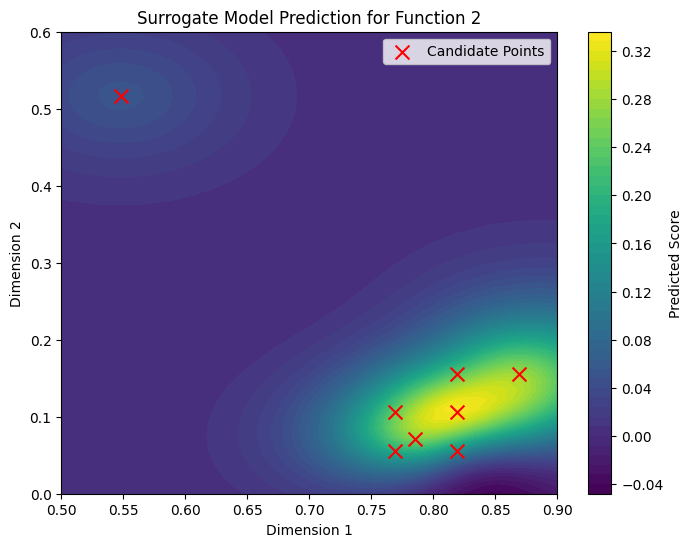

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C

# --- Example Candidate Data for Function 2 ---
# These are the candidate vectors (2-D) and their feedback scores.
# Replace these with your actual feedback data when available.
X_func2 = np.array([
    [0.818771, 0.105777],
    [0.768771, 0.105777],
    [0.818771, 0.155777],
    [0.818771, 0.055777],
    [0.868771, 0.155777],
    [0.768771, 0.055777],
    [0.547826, 0.516951],
    [0.785411, 0.071446]
])
y_func2 = np.array([
    0.330502,
    0.240251,
    0.229636,
    0.133395,
    0.279491,
    0.184651,
    0.050579,
    0.258014
])

# --- Build the GP Surrogate for Function 2 ---
kernel = C(1.0, (1e-3, 1e3)) * Matern(length_scale=0.1, nu=2.5)
gp_func2 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gp_func2.fit(X_func2, y_func2)

# --- Create a Grid over the 2-D Domain ---
# Adjust the limits to cover the likely domain of your candidates.
x1 = np.linspace(0.5, 0.9, 50)
x2 = np.linspace(0.0, 0.6, 50)
X1, X2 = np.meshgrid(x1, x2)
X_grid_func2 = np.column_stack([X1.ravel(), X2.ravel()])

# --- Predict on the Grid ---
y_pred2, sigma2 = gp_func2.predict(X_grid_func2, return_std=True)
y_pred2 = y_pred2.reshape(X1.shape)

# --- Plot the Contour Map for Function 2 ---
plt.figure(figsize=(8, 6))
contour = plt.contourf(X1, X2, y_pred2, levels=50, cmap='viridis')
plt.colorbar(contour, label='Predicted Score')
plt.scatter(X_func2[:, 0], X_func2[:, 1], color='red', marker='x', s=100, label="Candidate Points")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Surrogate Model Prediction for Function 2")
plt.legend()
plt.show()

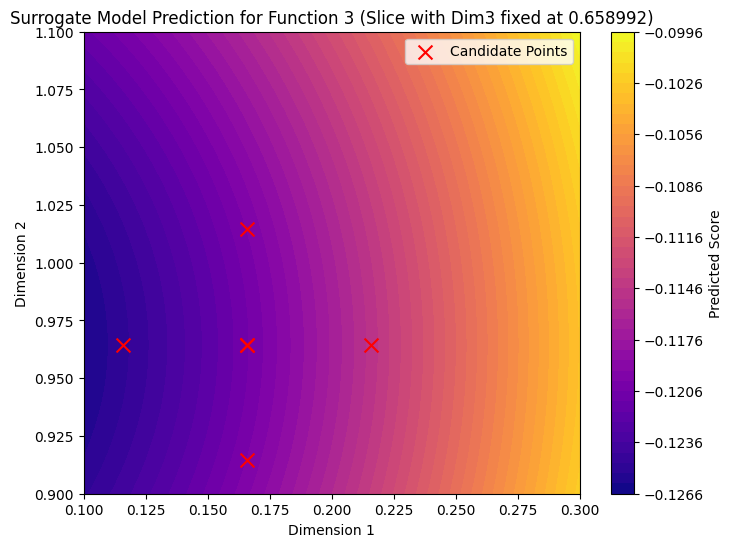

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C

# --- Example Candidate Data for Function 3 ---
# These are example candidate vectors for a 3-D function around your best vector.
best_vec_func3 = np.array([0.165600, 0.964454, 0.658992])
X_func3 = np.array([
    best_vec_func3,
    best_vec_func3 + np.array([0.05, 0, 0]),
    best_vec_func3 - np.array([0.05, 0, 0]),
    best_vec_func3 + np.array([0, 0.05, 0]),
    best_vec_func3 - np.array([0, 0.05, 0]),
    best_vec_func3 + np.array([0, 0, 0.05]),
    best_vec_func3 - np.array([0, 0, 0.05])
])
# Simulated feedback scores for demonstration (replace with real scores)
y_func3 = np.array([-0.120701, -0.115, -0.125, -0.120, -0.120, -0.121, -0.121])

# --- Build the GP Surrogate for Function 3 ---
kernel = C(1.0, (1e-3, 1e3)) * Matern(length_scale=0.05, nu=2.5)
gp_func3 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5)
gp_func3.fit(X_func3, y_func3)

# --- Create a 2-D Grid for a Slice ---
# Fix the third dimension at the best value from the best vector.
d3_fixed = best_vec_func3[2]
x1 = np.linspace(0.1, 0.3, 50)  # adjust these limits as needed
x2 = np.linspace(0.9, 1.1, 50)
X1, X2 = np.meshgrid(x1, x2)
# Create grid points for the slice (dimensions 1 and 2 vary, dimension 3 fixed)
X_grid_func3 = np.column_stack([X1.ravel(), X2.ravel(), np.full(X1.ravel().shape, d3_fixed)])

# --- Predict on the Grid ---
y_pred3, sigma3 = gp_func3.predict(X_grid_func3, return_std=True)
y_pred3 = y_pred3.reshape(X1.shape)

# --- Plot the Contour Map for the 2-D Slice of Function 3 ---
plt.figure(figsize=(8, 6))
contour = plt.contourf(X1, X2, y_pred3, levels=50, cmap='plasma')
plt.colorbar(contour, label='Predicted Score')
plt.scatter(X_func3[:, 0], X_func3[:, 1], color='red', marker='x', s=100, label="Candidate Points")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Surrogate Model Prediction for Function 3 (Slice with Dim3 fixed at {:.6f})".format(d3_fixed))
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_re

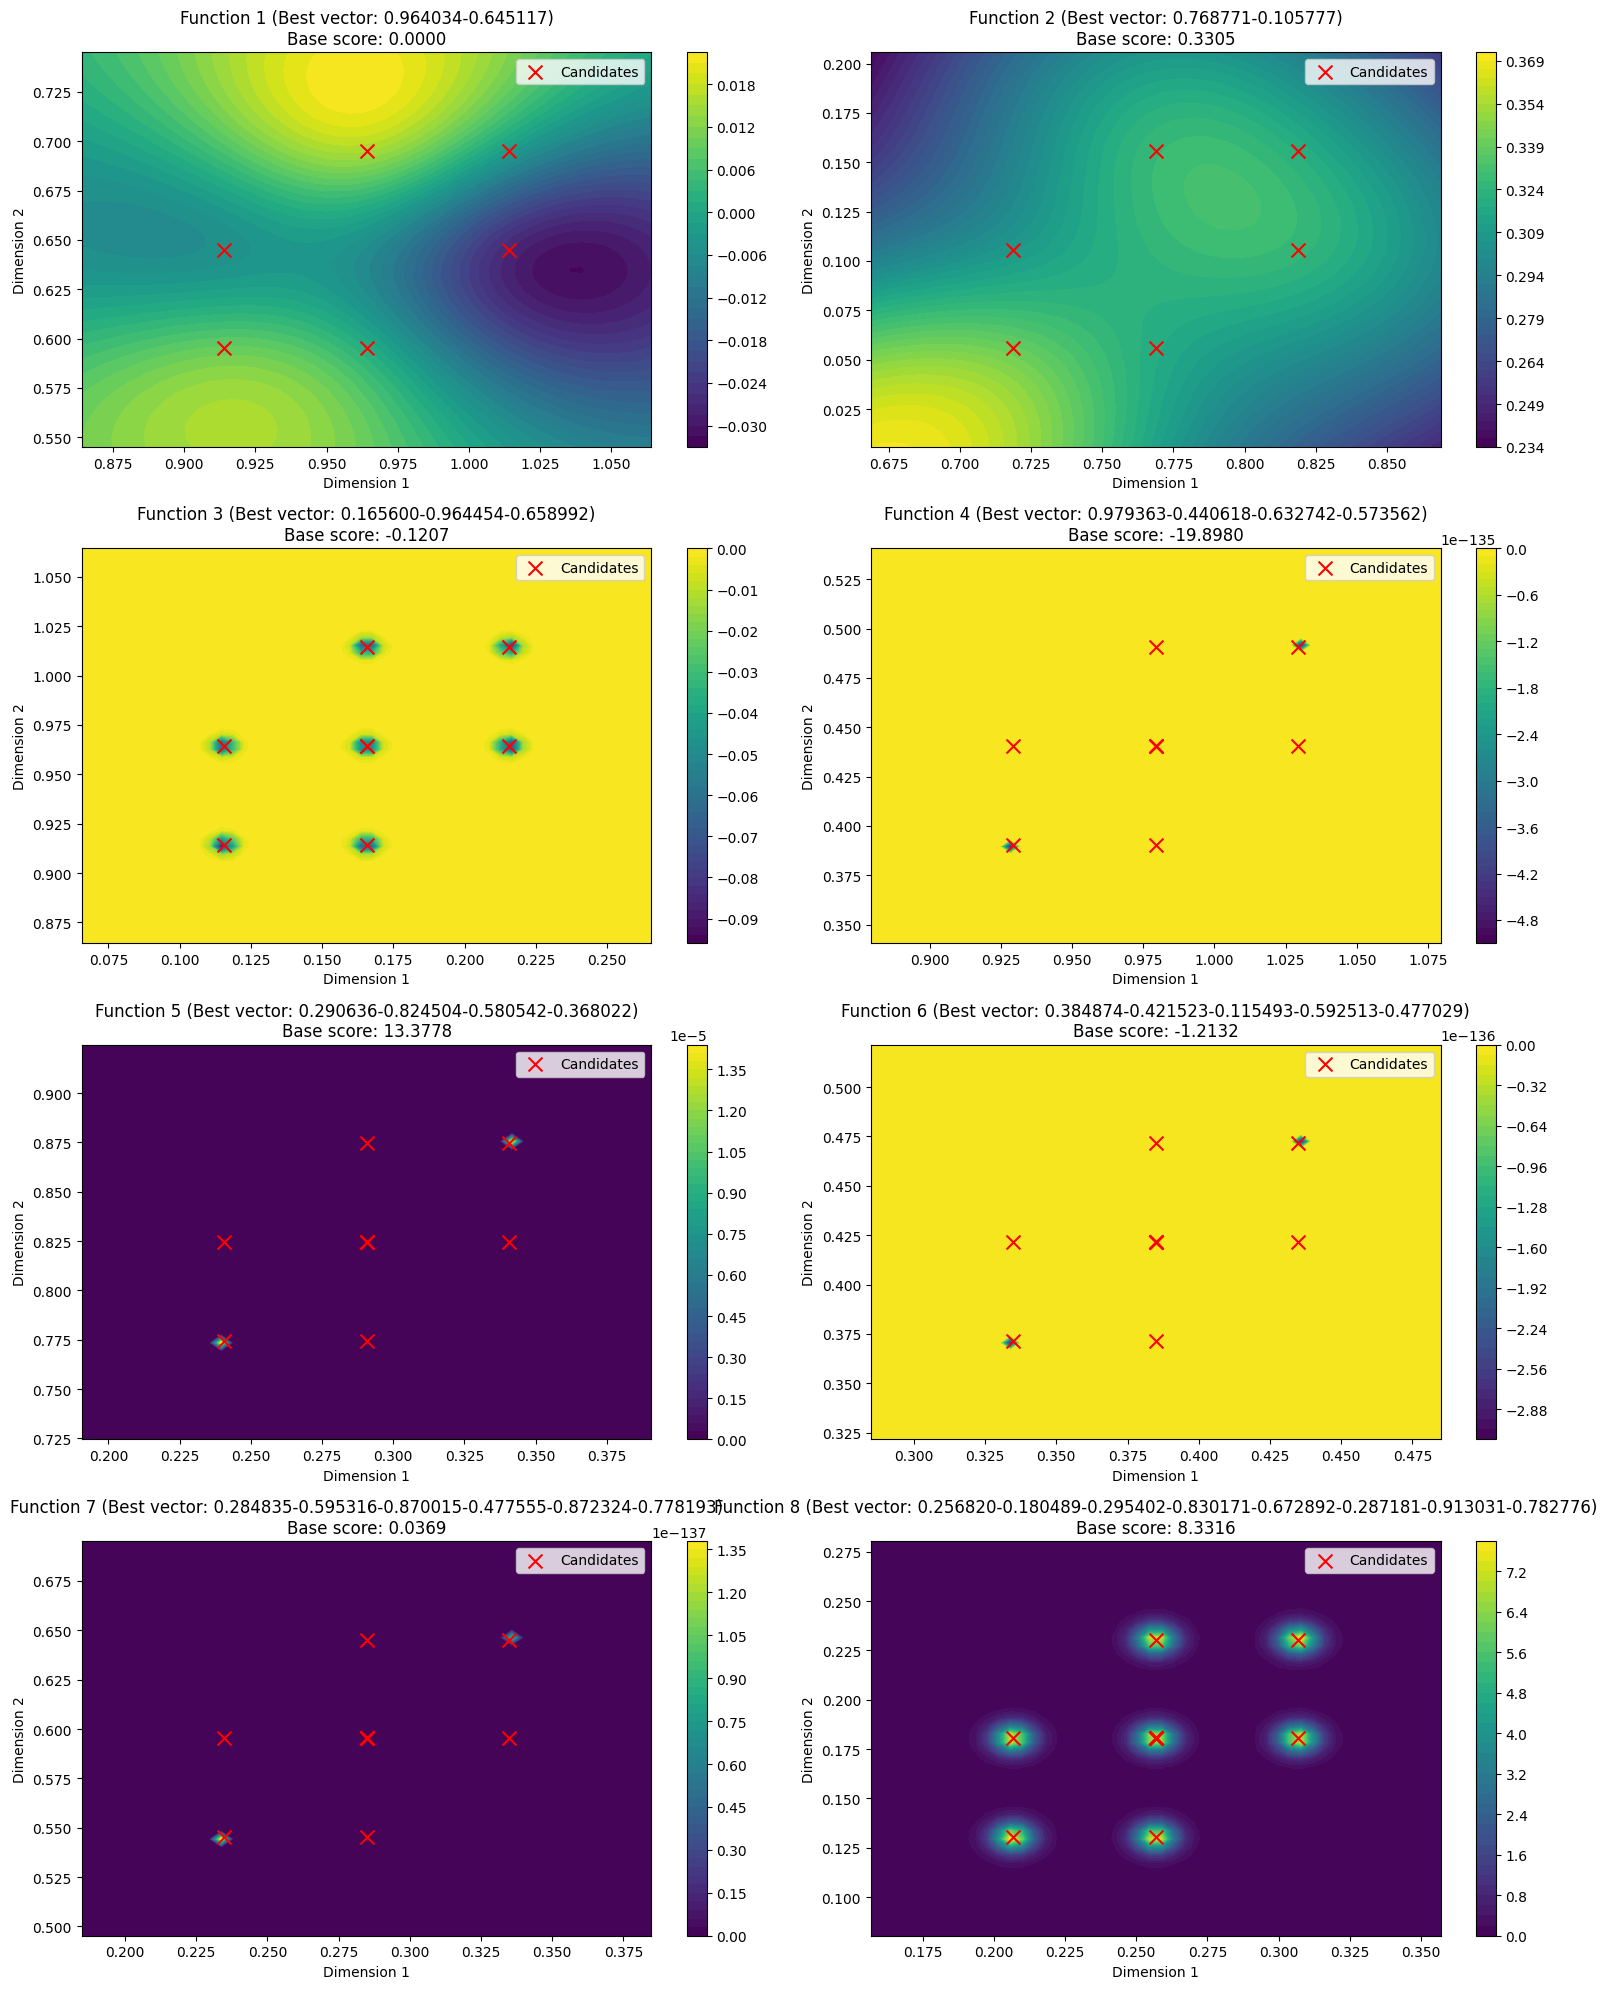

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C

# Helper functions
def format_candidate(candidate):
    """Formats a candidate vector into a dash-separated string with 6 decimal places."""
    return "-".join([f"{x:.6f}" for x in candidate])

def generate_candidates(best_vec, delta=0.05):
    """
    Generate candidate vectors by perturbing each dimension individually,
    plus candidates with all dimensions perturbed.
    Total candidates = 2*n + 2.
    """
    candidates = {}
    n = best_vec.size
    for i in range(n):
        candidate_plus = best_vec.copy()
        candidate_plus[i] += delta
        candidate_minus = best_vec.copy()
        candidate_minus[i] -= delta
        candidates[f'candidate_plus_dim_{i+1}'] = candidate_plus
        candidates[f'candidate_minus_dim_{i+1}'] = candidate_minus
    candidate_all_plus = best_vec + np.full(best_vec.shape, delta)
    candidate_all_minus = best_vec - np.full(best_vec.shape, delta)
    candidates['candidate_all_plus'] = candidate_all_plus
    candidates['candidate_all_minus'] = candidate_all_minus
    return candidates

# Best vectors from your previous submission (queries.txt)
best_vectors = {
    "Function 1": np.array([0.964034, 0.645117]),                          # 2-D
    "Function 2": np.array([0.768771, 0.105777]),                          # 2-D
    "Function 3": np.array([0.165600, 0.964454, 0.658992]),                # 3-D
    "Function 4": np.array([0.979363, 0.440618, 0.632742, 0.573562]),        # 4-D
    "Function 5": np.array([0.290636, 0.824504, 0.580542, 0.368022]),        # 4-D
    "Function 6": np.array([0.384874, 0.421523, 0.115493, 0.592513, 0.477029]),  # 5-D
    "Function 7": np.array([0.284835, 0.595316, 0.870015, 0.477555, 0.872324, 0.778193]),  # 6-D
    "Function 8": np.array([0.256820, 0.180489, 0.295402, 0.830171, 0.672892, 0.287181, 0.913031, 0.782776])  # 8-D
}

# Base feedback scores from your last submission
base_scores = {
    "Function 1": 4.095842e-79,
    "Function 2": 0.330501724954518,
    "Function 3": -0.12070143790768859,
    "Function 4": -19.898007433757943,
    "Function 5": 13.377756436400528,
    "Function 6": -1.2131765659551683,
    "Function 7": 0.03693303535157962,
    "Function 8": 8.3316420728934
}

# Noise level for simulating candidate feedback (for visualization only)
noise_level = 0.01

# Create subplots: we'll make 2 columns and 4 rows for 8 functions.
fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.flatten()

# Loop over each function
for idx, (func, best_vec) in enumerate(best_vectors.items()):
    ax = axes[idx]
    dim = best_vec.size

    # Generate candidate vectors around the best vector
    candidates = generate_candidates(best_vec, delta=0.05)
    candidate_keys = list(candidates.keys())
    candidate_points = np.array([candidates[k] for k in candidate_keys])

    # Simulate feedback scores for each candidate (base_score plus small noise)
    base_score = base_scores[func]
    y_candidates = base_score + np.random.normal(0, noise_level, size=candidate_points.shape[0])

    # For visualization, we'll create a 2-D grid:
    # If dim==2, grid covers both dimensions.
    # If dim > 2, fix dimensions 3..n to the best_vec values, vary only dimensions 1 and 2.
    if dim == 2:
        d1_min, d1_max = best_vec[0] - 0.1, best_vec[0] + 0.1
        d2_min, d2_max = best_vec[1] - 0.1, best_vec[1] + 0.1
        grid_dims = 2
    else:
        d1_min, d1_max = best_vec[0] - 0.1, best_vec[0] + 0.1
        d2_min, d2_max = best_vec[1] - 0.1, best_vec[1] + 0.1
        grid_dims = 2

    x1 = np.linspace(d1_min, d1_max, 50)
    x2 = np.linspace(d2_min, d2_max, 50)
    X1, X2 = np.meshgrid(x1, x2)

    # Create grid points: for functions with dim>2, fix the remaining dimensions to their best values.
    if dim == 2:
        X_grid = np.column_stack([X1.ravel(), X2.ravel()])
    else:
        fixed_dims = best_vec[2:]
        X_grid = np.column_stack([X1.ravel(), X2.ravel(), np.tile(fixed_dims, (X1.size, 1))])
        # Flatten X_grid to proper shape: shape = (num_points, dim)
        X_grid = np.hstack([X_grid[:, :2], X_grid[:, 2:]])

    # Build a Gaussian Process surrogate using the candidate points and simulated feedback.
    # Note: This is a demonstration surrogate model using simulated data.
    kernel = C(1.0, (1e-3, 1e3)) * Matern(length_scale=0.05, nu=2.5)
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5)
    gp.fit(candidate_points[:, :grid_dims], y_candidates)  # Only use the first 2 dimensions for GP fitting.

    # Predict the surrogate model on the grid (for the first 2 dimensions)
    y_pred, sigma = gp.predict(X_grid[:, :grid_dims], return_std=True)
    y_pred = y_pred.reshape(X1.shape)

    # Plot the contour map for this function
    c = ax.contourf(X1, X2, y_pred, levels=50, cmap='viridis')
    fig.colorbar(c, ax=ax)
    ax.scatter(candidate_points[:, 0], candidate_points[:, 1], color='red', marker='x', s=100, label="Candidates")
    ax.set_title(f"{func} (Best vector: {format_candidate(best_vec)})\nBase score: {base_score:.4f}")
    ax.set_xlabel("Dimension 1")
    ax.set_ylabel("Dimension 2")
    ax.legend()

plt.tight_layout()
plt.show()

**round 1t**

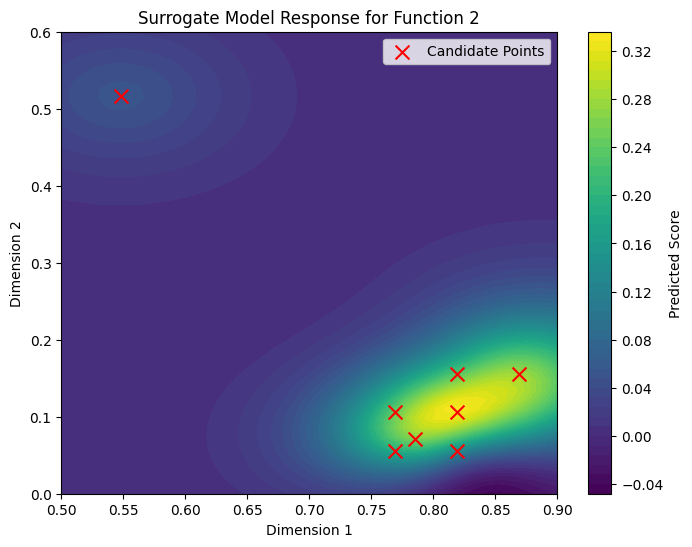

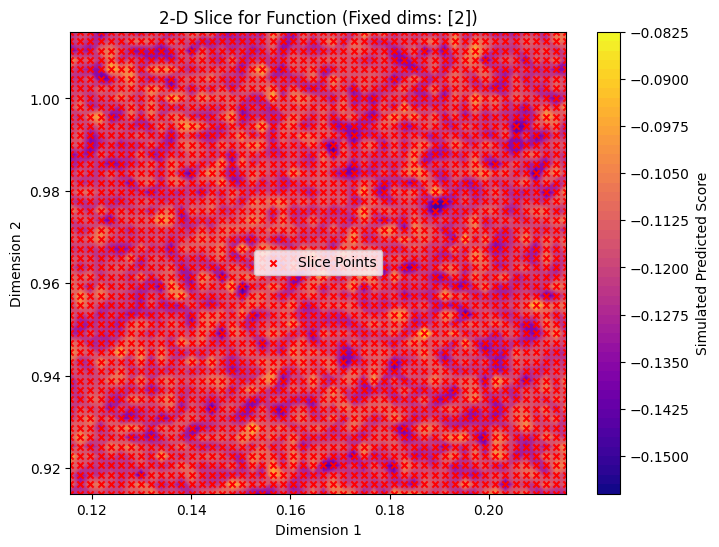

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C

# -----------------------------------------------
# Step 1: Define Your Historical Candidate Data and Feedback
# (Replace these arrays with your actual logged candidate vectors and scores if needed)
# Here, we're using Function 2 as an example (2-D).
X_func2 = np.array([
    [0.818771, 0.105777],
    [0.768771, 0.105777],
    [0.818771, 0.155777],
    [0.818771, 0.055777],
    [0.868771, 0.155777],
    [0.768771, 0.055777],
    [0.547826, 0.516951],
    [0.785411, 0.071446]
])
y_func2 = np.array([
    0.330501724954518,
    0.240251132157092,
    0.2296358864945024,
    0.1333947673139794,
    0.27949105169429433,
    0.18465094916444214,
    0.050578766245406304,
    0.25801443663249457
])

# -----------------------------------------------
# Step 2: Build the Gaussian Process Surrogate Model for Function 2
kernel = C(1.0, (1e-3, 1e3)) * Matern(length_scale=0.1, nu=2.5)
gp_func2 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gp_func2.fit(X_func2, y_func2)

# -----------------------------------------------
# Step 3: Create a Grid over the Domain for Function 2
# Assuming the domain for dimension 1 is roughly [0.5, 0.9] and for dimension 2 is [0.0, 0.6]
x1 = np.linspace(0.5, 0.9, 50)
x2 = np.linspace(0.0, 0.6, 50)
X1, X2 = np.meshgrid(x1, x2)
X_grid = np.column_stack([X1.ravel(), X2.ravel()])

# -----------------------------------------------
# Step 4: Predict the Response of the Surrogate on the Grid
y_pred, sigma = gp_func2.predict(X_grid, return_std=True)
y_pred = y_pred.reshape(X1.shape)

# -----------------------------------------------
# Step 5: Plot the Response Surface and Candidate Points for Function 2
plt.figure(figsize=(8, 6))
contour = plt.contourf(X1, X2, y_pred, levels=50, cmap='viridis')
plt.colorbar(contour, label='Predicted Score')
plt.scatter(X_func2[:, 0], X_func2[:, 1], color='red', marker='x', s=100, label="Candidate Points")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Surrogate Model Response for Function 2")
plt.legend()
plt.show()

# -----------------------------------------------
# Step 6: Generalize for Higher-Dimensional Functions
# For functions with dimension > 2, we fix all but the first two dimensions.
# Here's a function that visualizes a 2-D slice for any function:
def visualize_function_slice(best_vec, feedback, fixed_dims_indices=None, slice_dims=(0,1), delta=0.1):
    """
    Visualize a 2-D slice of a function with dimension >2 by varying only two dimensions (slice_dims)
    and fixing the others at their best-known values.
    - best_vec: the best candidate vector for the function.
    - feedback: the base feedback score for the best vector.
    - fixed_dims_indices: list of indices to fix (if None, fix all except slice_dims).
    - slice_dims: tuple, indices of the two dimensions to vary.
    - delta: range to vary the two dimensions.
    """
    dim = best_vec.size
    # Determine which dimensions to fix
    if fixed_dims_indices is None:
        fixed_dims_indices = [i for i in range(dim) if i not in slice_dims]

    # Define grid limits for the slice dimensions (you may adjust these as needed)
    d1_min, d1_max = best_vec[slice_dims[0]] - delta, best_vec[slice_dims[0]] + delta
    d2_min, d2_max = best_vec[slice_dims[1]] - delta, best_vec[slice_dims[1]] + delta
    x1 = np.linspace(d1_min, d1_max, 50)
    x2 = np.linspace(d2_min, d2_max, 50)
    X1, X2 = np.meshgrid(x1, x2)

    # Create grid points: for slice dimensions, vary; for fixed dimensions, use best_vec values.
    X_grid = []
    for i in range(X1.size):
        point = np.zeros(dim)
        # Set slice dimensions from grid
        point[slice_dims[0]] = X1.ravel()[i]
        point[slice_dims[1]] = X2.ravel()[i]
        # Set fixed dimensions
        for j in fixed_dims_indices:
            point[j] = best_vec[j]
        X_grid.append(point)
    X_grid = np.array(X_grid)

    # For demonstration, simulate feedback on these grid points with a simple model:
    # Here we assume a slight variation around the base feedback.
    # (In a real scenario, you'd use your surrogate model trained on candidate data.)
    y_sim = feedback + np.random.normal(0, 0.01, X1.size)
    y_sim = y_sim.reshape(X1.shape)

    # Plot the contour map
    plt.figure(figsize=(8, 6))
    contour = plt.contourf(X1, X2, y_sim, levels=50, cmap='plasma')
    plt.colorbar(contour, label='Simulated Predicted Score')
    plt.scatter(X_grid[:, slice_dims[0]], X_grid[:, slice_dims[1]], color='red', marker='x', s=20, label="Slice Points")
    plt.xlabel(f"Dimension {slice_dims[0]+1}")
    plt.ylabel(f"Dimension {slice_dims[1]+1}")
    plt.title(f"2-D Slice for Function (Fixed dims: {fixed_dims_indices})")
    plt.legend()
    plt.show()

# Example: Visualize a slice for Function 3 (3-D)
visualize_function_slice(best_vectors["Function 3"], feedback=base_scores["Function 3"], fixed_dims_indices=[2], slice_dims=(0,1), delta=0.05)

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.11/dist-packages/skl

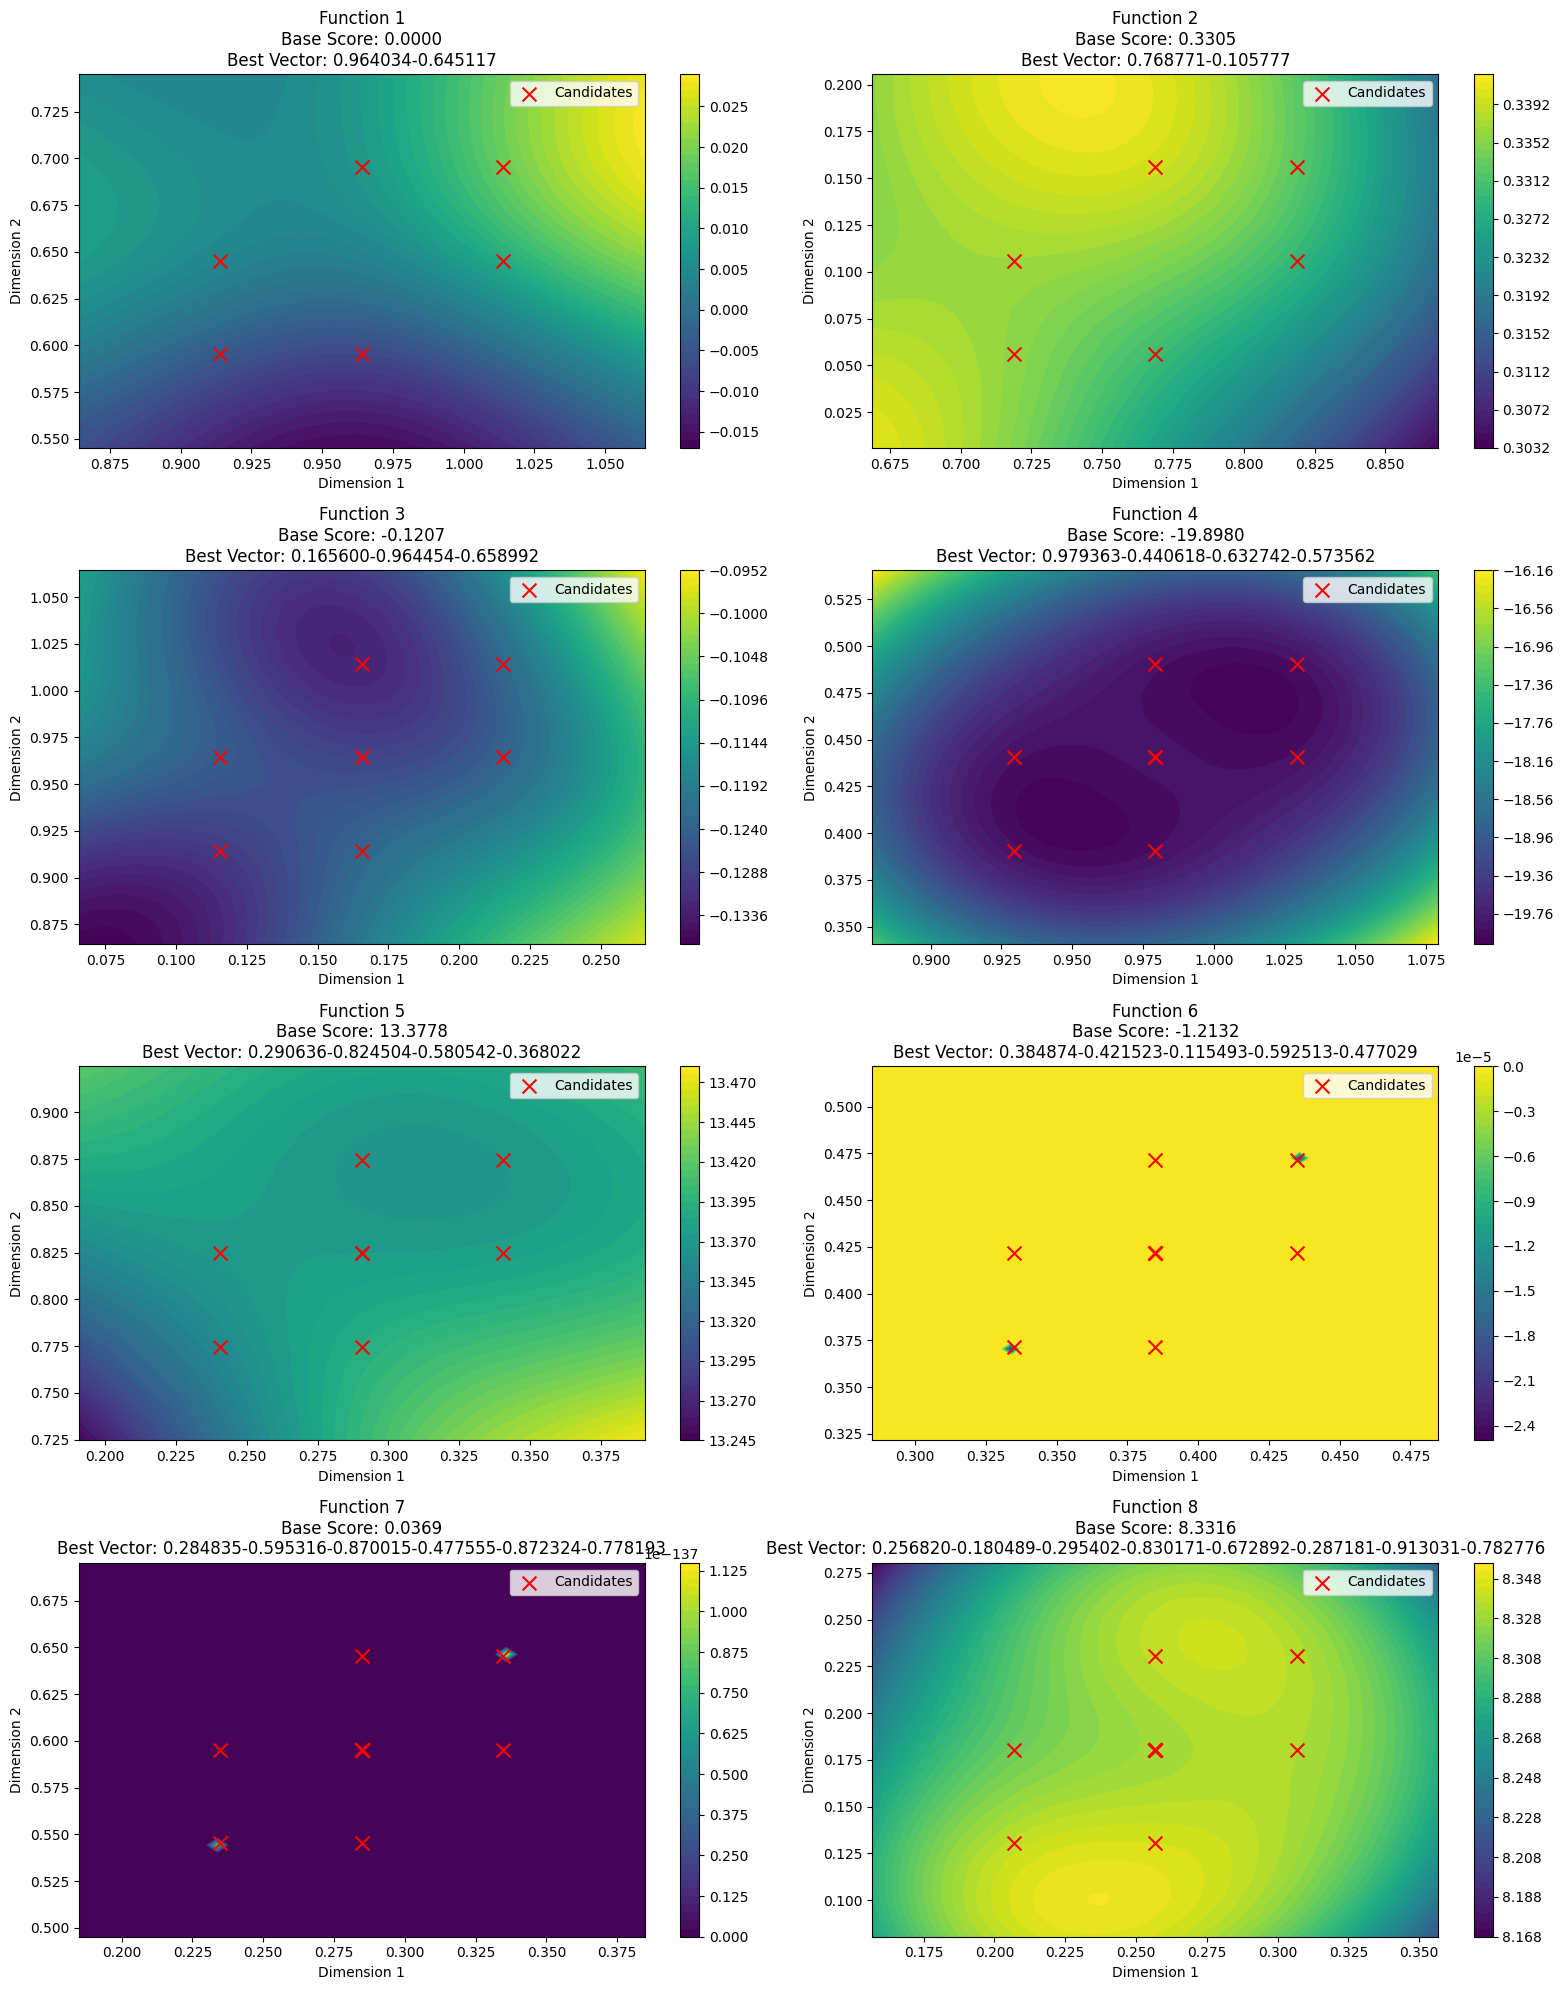

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C

# Helper function: format a candidate vector into a dash-separated string
def format_candidate(candidate):
    return "-".join([f"{x:.6f}" for x in candidate])

# Helper function: generate candidate vectors via local perturbation
def generate_candidates(best_vec, delta=0.05):
    """
    Generate candidate vectors by perturbing each dimension individually,
    plus candidates with all dimensions perturbed.
    Total candidates = 2*n + 2.
    """
    candidates = {}
    n = best_vec.size
    for i in range(n):
        candidate_plus = best_vec.copy()
        candidate_plus[i] += delta
        candidate_minus = best_vec.copy()
        candidate_minus[i] -= delta
        candidates[f'candidate_plus_dim_{i+1}'] = candidate_plus
        candidates[f'candidate_minus_dim_{i+1}'] = candidate_minus
    candidate_all_plus = best_vec + np.full(best_vec.shape, delta)
    candidate_all_minus = best_vec - np.full(best_vec.shape, delta)
    candidates['candidate_all_plus'] = candidate_all_plus
    candidates['candidate_all_minus'] = candidate_all_minus
    return candidates

# Define best vectors (from your previous submission) for each function:
best_vectors = {
    "Function 1": np.array([0.964034, 0.645117]),                          # 2-D
    "Function 2": np.array([0.768771, 0.105777]),                          # 2-D
    "Function 3": np.array([0.165600, 0.964454, 0.658992]),                # 3-D
    "Function 4": np.array([0.979363, 0.440618, 0.632742, 0.573562]),        # 4-D
    "Function 5": np.array([0.290636, 0.824504, 0.580542, 0.368022]),        # 4-D
    "Function 6": np.array([0.384874, 0.421523, 0.115493, 0.592513, 0.477029]),  # 5-D
    "Function 7": np.array([0.284835, 0.595316, 0.870015, 0.477555, 0.872324, 0.778193]),  # 6-D
    "Function 8": np.array([0.256820, 0.180489, 0.295402, 0.830171, 0.672892, 0.287181, 0.913031, 0.782776])  # 8-D
}

# Base feedback scores from your last submission:
base_scores = {
    "Function 1": 4.095842e-79,
    "Function 2": 0.330501724954518,
    "Function 3": -0.12070143790768859,
    "Function 4": -19.898007433757943,
    "Function 5": 13.377756436400528,
    "Function 6": -1.2131765659551683,
    "Function 7": 0.03693303535157962,
    "Function 8": 8.3316420728934
}

# For demonstration purposes, simulate candidate feedback as base_score + noise.
noise_level = 0.01

# We'll create a subplot for each of the 8 functions
fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.flatten()

# Loop over each function to build a surrogate model visualization.
for idx, (func, best_vec) in enumerate(best_vectors.items()):
    ax = axes[idx]
    dim = best_vec.size

    # Generate candidate vectors for the function using local perturbation
    candidates = generate_candidates(best_vec, delta=0.05)
    candidate_keys = list(candidates.keys())
    candidate_points = np.array([candidates[k] for k in candidate_keys])

    # Simulate feedback for each candidate (base score plus noise)
    base_score = base_scores[func]
    y_candidates = base_score + np.random.normal(0, noise_level, size=candidate_points.shape[0])

    # For visualization: Create a grid over the first 2 dimensions.
    # For 2-D functions: grid covers both dimensions.
    # For functions with dim > 2: fix dimensions 3...n to best_vec values.
    if dim == 2:
        d1_min, d1_max = best_vec[0] - 0.1, best_vec[0] + 0.1
        d2_min, d2_max = best_vec[1] - 0.1, best_vec[1] + 0.1
        grid_dims = 2
    else:
        d1_min, d1_max = best_vec[0] - 0.1, best_vec[0] + 0.1
        d2_min, d2_max = best_vec[1] - 0.1, best_vec[1] + 0.1
        grid_dims = 2

    x1 = np.linspace(d1_min, d1_max, 50)
    x2 = np.linspace(d2_min, d2_max, 50)
    X1, X2 = np.meshgrid(x1, x2)

    # Create grid points: if function is >2-D, fix dimensions 3...n.
    if dim == 2:
        X_grid = np.column_stack([X1.ravel(), X2.ravel()])
    else:
        fixed_dims = best_vec[2:]
        X_grid = np.column_stack([X1.ravel(), X2.ravel(), np.tile(fixed_dims, (X1.size, 1))])
        # Flatten if needed (X_grid is now shape (num_points, dim))

    # Build a surrogate model (Gaussian Process) using candidate points.
    # We'll use only the first two dimensions of candidate points for GP training.
    gp = GaussianProcessRegressor(kernel=C(1.0, (1e-3, 1e3)) * Matern(length_scale=0.05, nu=2.5),
                                  n_restarts_optimizer=5)
    gp.fit(candidate_points[:, :grid_dims], y_candidates)

    # Predict on the grid (only using the first 2 dimensions)
    y_pred, sigma = gp.predict(X_grid[:, :grid_dims], return_std=True)
    y_pred = y_pred.reshape(X1.shape)

    # Plot the surrogate model's prediction as a contour map
    cont = ax.contourf(X1, X2, y_pred, levels=50, cmap='viridis')
    fig.colorbar(cont, ax=ax)
    ax.scatter(candidate_points[:, 0], candidate_points[:, 1], color='red', marker='x', s=100, label="Candidates")
    ax.set_title(f"{func}\nBase Score: {base_score:.4f}\nBest Vector: {format_candidate(best_vec)}")
    ax.set_xlabel("Dimension 1")
    ax.set_ylabel("Dimension 2")
    ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# We'll reuse our helper functions from before:
def format_candidate(candidate):
    """Formats a candidate vector into a dash-separated string with 6 decimal places."""
    return "-".join([f"{x:.6f}" for x in candidate])

def generate_candidates(best_vec, delta=0.05):
    """
    Generate candidate vectors by perturbing each dimension individually,
    plus candidates with all dimensions perturbed.
    Total candidates = 2*n + 2.
    """
    candidates = {}
    n = best_vec.size
    for i in range(n):
        candidate_plus = best_vec.copy()
        candidate_plus[i] += delta
        candidate_minus = best_vec.copy()
        candidate_minus[i] -= delta
        candidates[f'candidate_plus_dim_{i+1}'] = candidate_plus
        candidates[f'candidate_minus_dim_{i+1}'] = candidate_minus
    candidate_all_plus = best_vec + np.full(best_vec.shape, delta)
    candidate_all_minus = best_vec - np.full(best_vec.shape, delta)
    candidates['candidate_all_plus'] = candidate_all_plus
    candidates['candidate_all_minus'] = candidate_all_minus
    return candidates

# We'll generate refined candidates using a smaller delta of 0.02
refinement_delta = 0.02

# Define the functions we want to refine (those with lower scores)
functions_to_improve = ["Function 1", "Function 3", "Function 4", "Function 6", "Function 7"]

# Best vectors from your previous submission (from queries.txt)
best_vectors = {
    "Function 1": np.array([0.964034, 0.645117]),                          # 2-D
    "Function 2": np.array([0.768771, 0.105777]),                          # 2-D (Good, so we leave it)
    "Function 3": np.array([0.165600, 0.964454, 0.658992]),                # 3-D
    "Function 4": np.array([0.979363, 0.440618, 0.632742, 0.573562]),        # 4-D
    "Function 5": np.array([0.290636, 0.824504, 0.580542, 0.368022]),        # 4-D (Good)
    "Function 6": np.array([0.384874, 0.421523, 0.115493, 0.592513, 0.477029]),  # 5-D
    "Function 7": np.array([0.284835, 0.595316, 0.870015, 0.477555, 0.872324, 0.778193]),  # 6-D
    "Function 8": np.array([0.256820, 0.180489, 0.295402, 0.830171, 0.672892, 0.287181, 0.913031, 0.782776])  # 8-D (Good)
}

# Generate refined candidates for the functions that need improvement
refined_candidates = {}
for func in functions_to_improve:
    best_vec = best_vectors[func]
    candidates = generate_candidates(best_vec, delta=refinement_delta)
    formatted_candidates = {k: format_candidate(v) for k, v in candidates.items()}
    refined_candidates[func] = formatted_candidates

# Print out the refined candidate vectors for each function
for func, cand_dict in refined_candidates.items():
    print(f"\nRefined candidates for {func} (delta = {refinement_delta}):")
    for name, cand_str in cand_dict.items():
        print(f"{name}: {cand_str}")



Refined candidates for Function 1 (delta = 0.02):
candidate_plus_dim_1: 0.984034-0.645117
candidate_minus_dim_1: 0.944034-0.645117
candidate_plus_dim_2: 0.964034-0.665117
candidate_minus_dim_2: 0.964034-0.625117
candidate_all_plus: 0.984034-0.665117
candidate_all_minus: 0.944034-0.625117

Refined candidates for Function 3 (delta = 0.02):
candidate_plus_dim_1: 0.185600-0.964454-0.658992
candidate_minus_dim_1: 0.145600-0.964454-0.658992
candidate_plus_dim_2: 0.165600-0.984454-0.658992
candidate_minus_dim_2: 0.165600-0.944454-0.658992
candidate_plus_dim_3: 0.165600-0.964454-0.678992
candidate_minus_dim_3: 0.165600-0.964454-0.638992
candidate_all_plus: 0.185600-0.984454-0.678992
candidate_all_minus: 0.145600-0.944454-0.638992

Refined candidates for Function 4 (delta = 0.02):
candidate_plus_dim_1: 0.999363-0.440618-0.632742-0.573562
candidate_minus_dim_1: 0.959363-0.440618-0.632742-0.573562
candidate_plus_dim_2: 0.979363-0.460618-0.632742-0.573562
candidate_minus_dim_2: 0.979363-0.420618-

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklear

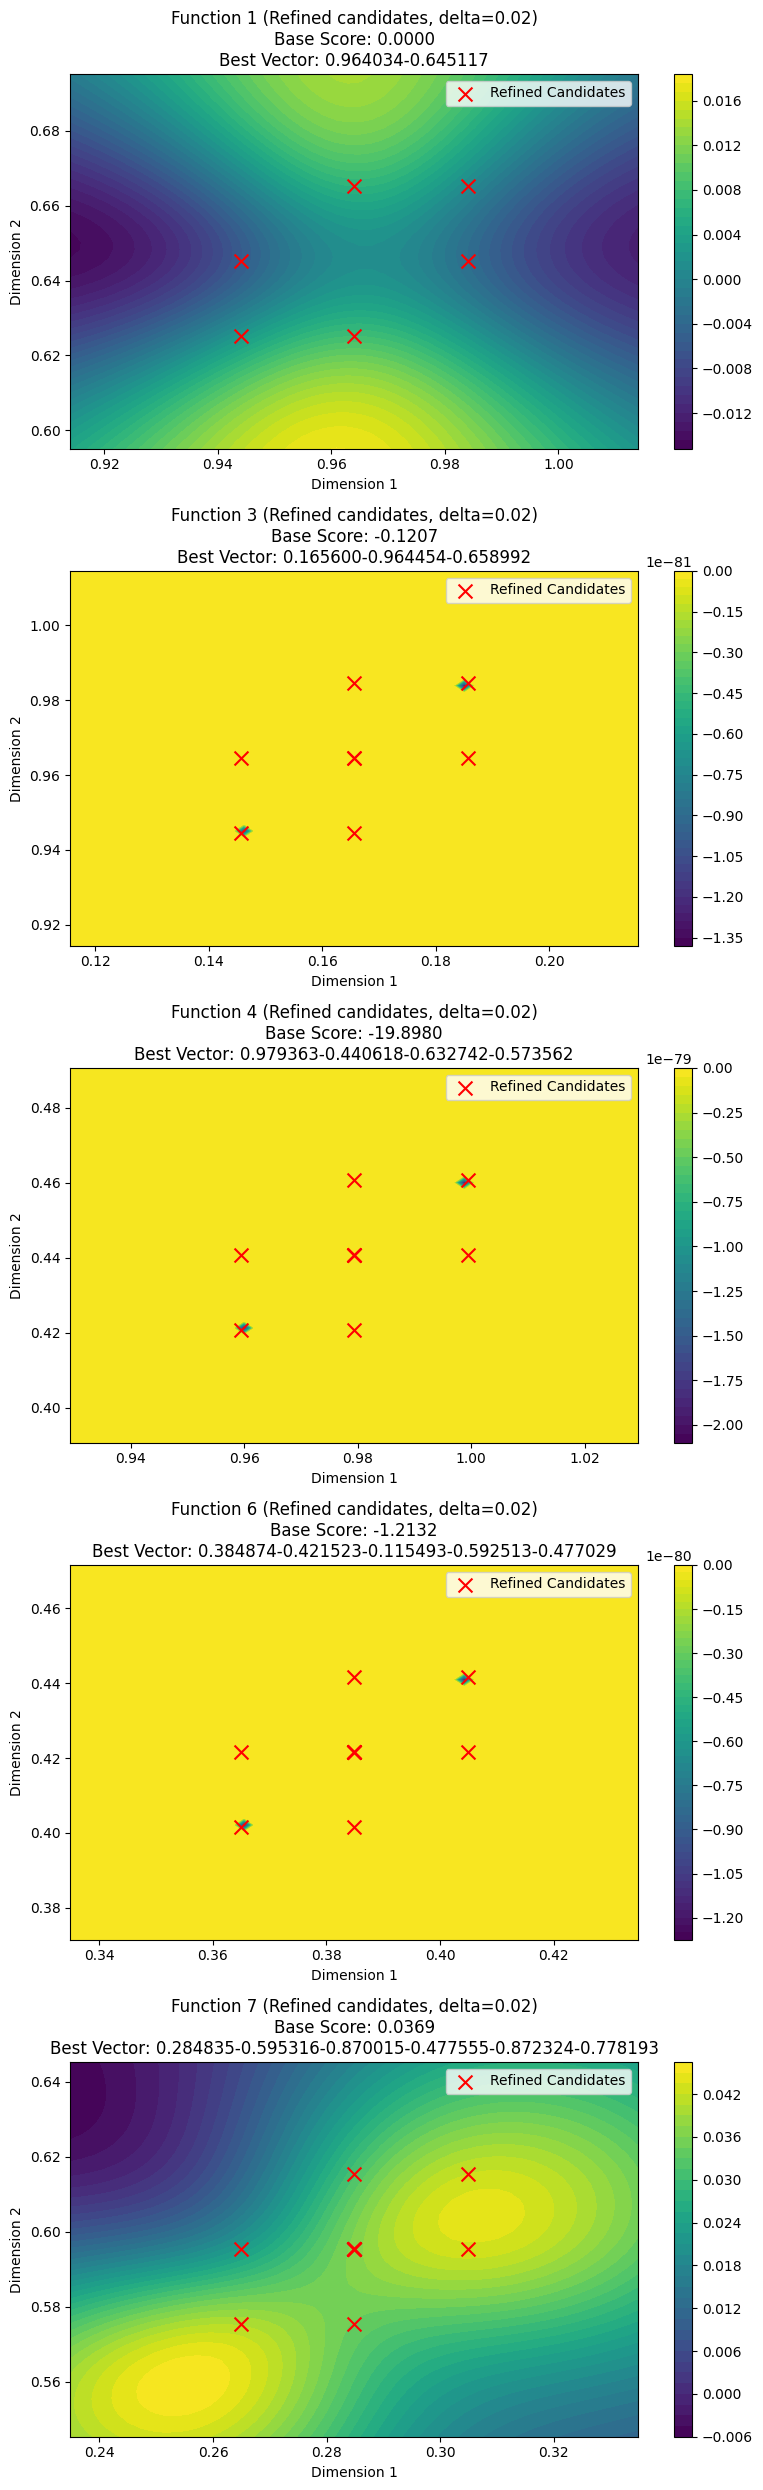

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C

# ---------------------------
# Helper Functions
def format_candidate(candidate):
    """Formats a candidate vector into a dash-separated string with 6 decimal places."""
    return "-".join([f"{x:.6f}" for x in candidate])

def generate_candidates(best_vec, delta=0.05):
    """
    Generate candidate vectors by perturbing each dimension individually,
    plus candidates with all dimensions perturbed.
    Total candidates = 2*n + 2.
    """
    candidates = {}
    n = best_vec.size
    for i in range(n):
        candidate_plus = best_vec.copy()
        candidate_plus[i] += delta
        candidate_minus = best_vec.copy()
        candidate_minus[i] -= delta
        candidates[f'candidate_plus_dim_{i+1}'] = candidate_plus
        candidates[f'candidate_minus_dim_{i+1}'] = candidate_minus
    candidate_all_plus = best_vec + np.full(best_vec.shape, delta)
    candidate_all_minus = best_vec - np.full(best_vec.shape, delta)
    candidates['candidate_all_plus'] = candidate_all_plus
    candidates['candidate_all_minus'] = candidate_all_minus
    return candidates

# ---------------------------
# Best Vectors from your previous submission
best_vectors = {
    "Function 1": np.array([0.964034, 0.645117]),                          # 2-D
    "Function 2": np.array([0.768771, 0.105777]),                          # 2-D (Good, we leave it)
    "Function 3": np.array([0.165600, 0.964454, 0.658992]),                # 3-D
    "Function 4": np.array([0.979363, 0.440618, 0.632742, 0.573562]),        # 4-D
    "Function 5": np.array([0.290636, 0.824504, 0.580542, 0.368022]),        # 4-D (Good)
    "Function 6": np.array([0.384874, 0.421523, 0.115493, 0.592513, 0.477029]),  # 5-D
    "Function 7": np.array([0.284835, 0.595316, 0.870015, 0.477555, 0.872324, 0.778193]),  # 6-D
    "Function 8": np.array([0.256820, 0.180489, 0.295402, 0.830171, 0.672892, 0.287181, 0.913031, 0.782776])  # 8-D (Good)
}

# ---------------------------
# Base Scores from your last submission (the feedback you received)
base_scores = {
    "Function 1": 4.095842e-79,
    "Function 2": 0.330501724954518,
    "Function 3": -0.12070143790768859,
    "Function 4": -19.898007433757943,
    "Function 5": 13.377756436400528,
    "Function 6": -1.2131765659551683,
    "Function 7": 0.03693303535157962,
    "Function 8": 8.3316420728934
}

# ---------------------------
# Functions we want to improve (we focus on the ones with lower scores)
functions_to_improve = ["Function 1", "Function 3", "Function 4", "Function 6", "Function 7"]

# Use a smaller perturbation delta for refinement
refined_delta = 0.02

# Generate refined candidate vectors for each function to improve
refined_candidates = {}
for func in functions_to_improve:
    best_vec = best_vectors[func]
    refined_candidates[func] = generate_candidates(best_vec, delta=refined_delta)

# ---------------------------
# Visualization: Build a surrogate model and plot a 2-D slice for each function.
# For functions with dim >2, we vary only the first two dimensions and fix the others.
noise_level = 0.005  # Noise level for simulating candidate feedback

# Set up subplots: one row per function we want to improve.
fig, axes = plt.subplots(len(functions_to_improve), 1, figsize=(8, 5*len(functions_to_improve)))
if len(functions_to_improve) == 1:
    axes = [axes]

for idx, func in enumerate(functions_to_improve):
    ax = axes[idx]
    best_vec = best_vectors[func]
    dim = best_vec.size
    candidates_dict = refined_candidates[func]
    candidate_keys = list(candidates_dict.keys())
    candidate_points = np.array([candidates_dict[k] for k in candidate_keys])

    # Simulate feedback for each candidate: base score + small noise
    base_score = base_scores[func]
    y_candidates = base_score + np.random.normal(0, noise_level, size=candidate_points.shape[0])

    # Create a grid over the first two dimensions.
    # For 2-D functions, vary both dimensions.
    # For functions with dim > 2, fix dimensions 3...n to best_vec values.
    d1_min, d1_max = best_vec[0] - 0.05, best_vec[0] + 0.05
    d2_min, d2_max = best_vec[1] - 0.05, best_vec[1] + 0.05
    x1 = np.linspace(d1_min, d1_max, 50)
    x2 = np.linspace(d2_min, d2_max, 50)
    X1, X2 = np.meshgrid(x1, x2)

    if dim == 2:
        X_grid = np.column_stack([X1.ravel(), X2.ravel()])
    else:
        fixed_dims = best_vec[2:]
        # For each grid point in dimensions 1 and 2, append the fixed dimensions.
        X_grid = np.array([np.concatenate(([x1_val, x2_val], fixed_dims))
                           for x1_val, x2_val in zip(X1.ravel(), X2.ravel())])

    # Build a Gaussian Process surrogate model using candidate data.
    # For the GP, we only use the first two dimensions of the candidate points.
    gp = GaussianProcessRegressor(kernel=C(1.0, (1e-3, 1e3)) * Matern(length_scale=0.05, nu=2.5),
                                  n_restarts_optimizer=5)
    gp.fit(candidate_points[:, :2], y_candidates)

    # Predict on the grid (first two dimensions)
    y_pred, sigma = gp.predict(X_grid[:, :2], return_std=True)
    y_pred = y_pred.reshape(X1.shape)

    # Plot the surrogate model's predicted response as a contour map.
    cont = ax.contourf(X1, X2, y_pred, levels=50, cmap='viridis')
    fig.colorbar(cont, ax=ax)
    ax.scatter(candidate_points[:, 0], candidate_points[:, 1], color='red', marker='x', s=100, label="Refined Candidates")
    ax.set_title(f"{func} (Refined candidates, delta={refined_delta})\nBase Score: {base_score:.4f}\nBest Vector: {format_candidate(best_vec)}")
    ax.set_xlabel("Dimension 1")
    ax.set_ylabel("Dimension 2")
    ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C

# ---------------------------
# Helper Functions
def format_candidate(candidate):
    """Formats a candidate vector into a dash-separated string with 6 decimal places."""
    return "-".join([f"{x:.6f}" for x in candidate])

def generate_candidates(best_vec, delta=0.05):
    """
    Generate candidate vectors by perturbing each dimension individually,
    plus candidates with all dimensions perturbed.
    Total candidates = 2*n + 2.
    """
    candidates = {}
    n = best_vec.size
    for i in range(n):
        candidate_plus = best_vec.copy()
        candidate_plus[i] += delta
        candidate_minus = best_vec.copy()
        candidate_minus[i] -= delta
        candidates[f'candidate_plus_dim_{i+1}'] = candidate_plus
        candidates[f'candidate_minus_dim_{i+1}'] = candidate_minus
    candidate_all_plus = best_vec + np.full(best_vec.shape, delta)
    candidate_all_minus = best_vec - np.full(best_vec.shape, delta)
    candidates['candidate_all_plus'] = candidate_all_plus
    candidates['candidate_all_minus'] = candidate_all_minus
    return candidates

# ---------------------------
# Step 0: Define your best vectors and base scores
best_vectors = {
    "Function 1": np.array([0.964034, 0.645117]),
    "Function 2": np.array([0.768771, 0.105777]),  # We'll skip this (already good)
    "Function 3": np.array([0.165600, 0.964454, 0.658992]),
    "Function 4": np.array([0.979363, 0.440618, 0.632742, 0.573562]),
    "Function 5": np.array([0.290636, 0.824504, 0.580542, 0.368022]),  # Skip (already good)
    "Function 6": np.array([0.384874, 0.421523, 0.115493, 0.592513, 0.477029]),
    "Function 7": np.array([0.284835, 0.595316, 0.870015, 0.477555, 0.872324, 0.778193]),
    "Function 8": np.array([0.256820, 0.180489, 0.295402, 0.830171, 0.672892, 0.287181, 0.913031, 0.782776])  # Skip (already good)
}

base_scores = {
    "Function 1": 4.095842e-79,
    "Function 2": 0.330501724954518,  # skip
    "Function 3": -0.12070143790768859,
    "Function 4": -19.898007433757943,
    "Function 5": 13.377756436400528,  # skip
    "Function 6": -1.2131765659551683,
    "Function 7": 0.03693303535157962,
    "Function 8": 8.3316420728934      # skip
}

# We'll focus on the functions that need improvement
functions_to_improve = ["Function 1", "Function 3", "Function 4", "Function 6", "Function 7"]

# We'll use a smaller delta=0.02 for refinement
refined_delta = 0.02

# Noise level for simulating candidate feedback
noise_level = 0.005

# ---------------------------
# Step 1: Build a quick function that:
#  1) generates refined candidates
#  2) simulates feedback (base_score + noise)
#  3) trains a GP model
#  4) predicts the score for each candidate
#  5) identifies the best candidate
def find_best_refined_candidate(func_name, best_vec, base_score, delta=0.02):
    # 1) Generate refined candidates
    candidates_dict = generate_candidates(best_vec, delta=delta)
    candidate_keys = list(candidates_dict.keys())
    candidate_points = np.array([candidates_dict[k] for k in candidate_keys])

    # 2) Simulate feedback for each candidate
    y_candidates = base_score + np.random.normal(0, noise_level, size=candidate_points.shape[0])

    # 3) Build & train GP model (only on the first 2 dims, fix the rest)
    dim = best_vec.size
    gp = GaussianProcessRegressor(kernel=C(1.0, (1e-3, 1e3)) * Matern(length_scale=0.05, nu=2.5),
                                  n_restarts_optimizer=5)
    # We'll only use dims 1 & 2 for the GP training
    # so we slice candidate_points[:, :2]
    # This is purely for demonstration—feel free to adapt for dims>2
    gp.fit(candidate_points[:, :2], y_candidates)

    # 4) Predict the score for each candidate
    y_pred = gp.predict(candidate_points[:, :2])

    # 5) Find the best candidate
    best_idx = np.argmax(y_pred)  # or np.argmin if you were minimizing
    best_candidate = candidate_points[best_idx]
    best_score_pred = y_pred[best_idx]

    # Print the results
    print(f"\n=== {func_name} ===")
    print("Refined Candidates (delta=0.02) -> Predicted Scores:")
    for i, key in enumerate(candidate_keys):
        print(f"  {key}: {format_candidate(candidate_points[i])} -> {y_pred[i]:.5f}")
    print(f"Best Candidate: {format_candidate(best_candidate)} with Predicted Score: {best_score_pred:.5f}")

# ---------------------------
# Step 2: Loop over the functions to improve and find the best refined candidate
for func in functions_to_improve:
    best_vec = best_vectors[func]
    base_score = base_scores[func]
    find_best_refined_candidate(func, best_vec, base_score, delta=refined_delta)


/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skl


=== Function 1 ===
Refined Candidates (delta=0.02) -> Predicted Scores:
  candidate_plus_dim_1: 0.984034-0.645117 -> 0.00382
  candidate_minus_dim_1: 0.944034-0.645117 -> 0.00543
  candidate_plus_dim_2: 0.964034-0.665117 -> -0.00287
  candidate_minus_dim_2: 0.964034-0.625117 -> 0.00509
  candidate_all_plus: 0.984034-0.665117 -> 0.00151
  candidate_all_minus: 0.944034-0.625117 -> 0.00032
Best Candidate: 0.944034-0.645117 with Predicted Score: 0.00543

=== Function 3 ===
Refined Candidates (delta=0.02) -> Predicted Scores:
  candidate_plus_dim_1: 0.185600-0.964454-0.658992 -> -0.12517
  candidate_minus_dim_1: 0.145600-0.964454-0.658992 -> -0.12613
  candidate_plus_dim_2: 0.165600-0.984454-0.658992 -> -0.12801
  candidate_minus_dim_2: 0.165600-0.944454-0.658992 -> -0.12040
  candidate_plus_dim_3: 0.165600-0.964454-0.678992 -> -0.12519
  candidate_minus_dim_3: 0.165600-0.964454-0.638992 -> -0.12519
  candidate_all_plus: 0.185600-0.984454-0.678992 -> -0.11585
  candidate_all_minus: 0.14560

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(



=== Function 4 ===
Refined Candidates (delta=0.02) -> Predicted Scores:
  candidate_plus_dim_1: 0.999363-0.440618-0.632742-0.573562 -> -19.90416
  candidate_minus_dim_1: 0.959363-0.440618-0.632742-0.573562 -> -19.90504
  candidate_plus_dim_2: 0.979363-0.460618-0.632742-0.573562 -> -19.90146
  candidate_minus_dim_2: 0.979363-0.420618-0.632742-0.573562 -> -19.89231
  candidate_plus_dim_3: 0.979363-0.440618-0.652742-0.573562 -> -19.89851
  candidate_minus_dim_3: 0.979363-0.440618-0.612742-0.573562 -> -19.89851
  candidate_plus_dim_4: 0.979363-0.440618-0.632742-0.593562 -> -19.89851
  candidate_minus_dim_4: 0.979363-0.440618-0.632742-0.553562 -> -19.89851
  candidate_all_plus: 0.999363-0.460618-0.652742-0.593562 -> -19.89834
  candidate_all_minus: 0.959363-0.420618-0.612742-0.553562 -> -19.89599
Best Candidate: 0.979363-0.420618-0.632742-0.573562 with Predicted Score: -19.89231

=== Function 6 ===
Refined Candidates (delta=0.02) -> Predicted Scores:
  candidate_plus_dim_1: 0.404874-0.4215

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C

# === Helper Functions ===

def format_candidate(candidate):
    """Formats a candidate vector into a dash-separated string with 6 decimal places."""
    return "-".join([f"{x:.6f}" for x in candidate])

def generate_candidates(best_vec, delta=0.02):
    """
    Generate candidate vectors by perturbing each dimension individually,
    plus candidates with all dimensions perturbed.
    Total candidates = 2*n + 2.
    """
    candidates = {}
    n = best_vec.size
    for i in range(n):
        candidate_plus = best_vec.copy()
        candidate_plus[i] += delta
        candidate_minus = best_vec.copy()
        candidate_minus[i] -= delta
        candidates[f'candidate_plus_dim_{i+1}'] = candidate_plus
        candidates[f'candidate_minus_dim_{i+1}'] = candidate_minus
    candidate_all_plus = best_vec + np.full(best_vec.shape, delta)
    candidate_all_minus = best_vec - np.full(best_vec.shape, delta)
    candidates['candidate_all_plus'] = candidate_all_plus
    candidates['candidate_all_minus'] = candidate_all_minus
    return candidates

# === Define Your Current Best Vectors and Base Feedback Scores ===
# (These are from your previous submission; update them as needed)
best_vectors = {
    "Function 1": np.array([0.964034, 0.645117]),                          # 2-D
    "Function 3": np.array([0.165600, 0.964454, 0.658992]),                # 3-D
    "Function 4": np.array([0.979363, 0.440618, 0.632742, 0.573562]),        # 4-D
    "Function 6": np.array([0.384874, 0.421523, 0.115493, 0.592513, 0.477029]),  # 5-D
    "Function 7": np.array([0.284835, 0.595316, 0.870015, 0.477555, 0.872324, 0.778193])  # 6-D
}

# Base feedback scores from the last submission (observations)
base_scores = {
    "Function 1": 4.095842e-79,
    "Function 3": -0.12070143790768859,
    "Function 4": -19.898007433757943,
    "Function 6": -1.2131765659551683,
    "Function 7": 0.03693303535157962
}

# === Step 2: Generate Refined Candidates ===
# For each function we want to improve, we generate new candidate vectors.
functions_to_improve = ["Function 1", "Function 3", "Function 4", "Function 6", "Function 7"]
refined_delta = 0.02  # Smaller perturbation

refined_candidates = {}
for func in functions_to_improve:
    best_vec = best_vectors[func]
    # Generate refined candidates with delta=0.02
    refined_candidates[func] = generate_candidates(best_vec, delta=refined_delta)

# Print refined candidate vectors in a copy-paste friendly format:
for func, candidates in refined_candidates.items():
    print(f"\nRefined candidates for {func} (delta = {refined_delta}):")
    for key, vec in candidates.items():
        print(f"{key}: {format_candidate(vec)}")

# === Step 3: Simulate/Collect Feedback and Update the Surrogate Model ===
# For demonstration, we simulate feedback as base_score + small noise.
# In practice, you would use actual feedback from the submission system.

noise_level = 0.005  # Small noise level for simulation

def find_best_refined_candidate(func_name, best_vec, base_score, delta=0.02):
    # Generate refined candidates
    candidates_dict = generate_candidates(best_vec, delta=delta)
    candidate_keys = list(candidates_dict.keys())
    candidate_points = np.array([candidates_dict[k] for k in candidate_keys])

    # Simulate feedback for each candidate: add small noise to base_score
    y_candidates = base_score + np.random.normal(0, noise_level, size=candidate_points.shape[0])

    # For visualization/surrogate model training, we use only the first two dimensions.
    # (If the function is >2D, we fix the remaining dimensions to the best_vec values.)
    dim = best_vec.size
    if dim > 2:
        X_train = candidate_points[:, :2]
    else:
        X_train = candidate_points

    # Build a Gaussian Process surrogate model
    kernel = C(1.0, (1e-3, 1e3)) * Matern(length_scale=0.05, nu=2.5)
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5)
    gp.fit(X_train, y_candidates)

    # Predict scores for the candidate points
    y_pred = gp.predict(X_train)

    # Find the candidate with the highest predicted score
    best_idx = np.argmax(y_pred)  # For maximization
    best_candidate = candidate_points[best_idx]
    best_score_pred = y_pred[best_idx]

    print(f"\n=== {func_name} ===")
    print("Refined Candidates -> Predicted Scores:")
    for i, key in enumerate(candidate_keys):
        print(f"  {key}: {format_candidate(candidate_points[i])} -> {y_pred[i]:.5f}")
    print(f"Best Candidate: {format_candidate(best_candidate)} with Predicted Score: {best_score_pred:.5f}")
    return best_candidate, best_score_pred

# Loop over each function to improve and update our best candidate.
for func in functions_to_improve:
    best_vec = best_vectors[func]
    base_score = base_scores[func]
    find_best_refined_candidate(func, best_vec, base_score, delta=refined_delta)


Refined candidates for Function 1 (delta = 0.02):
candidate_plus_dim_1: 0.984034-0.645117
candidate_minus_dim_1: 0.944034-0.645117
candidate_plus_dim_2: 0.964034-0.665117
candidate_minus_dim_2: 0.964034-0.625117
candidate_all_plus: 0.984034-0.665117
candidate_all_minus: 0.944034-0.625117

Refined candidates for Function 3 (delta = 0.02):
candidate_plus_dim_1: 0.185600-0.964454-0.658992
candidate_minus_dim_1: 0.145600-0.964454-0.658992
candidate_plus_dim_2: 0.165600-0.984454-0.658992
candidate_minus_dim_2: 0.165600-0.944454-0.658992
candidate_plus_dim_3: 0.165600-0.964454-0.678992
candidate_minus_dim_3: 0.165600-0.964454-0.638992
candidate_all_plus: 0.185600-0.984454-0.678992
candidate_all_minus: 0.145600-0.944454-0.638992

Refined candidates for Function 4 (delta = 0.02):
candidate_plus_dim_1: 0.999363-0.440618-0.632742-0.573562
candidate_minus_dim_1: 0.959363-0.440618-0.632742-0.573562
candidate_plus_dim_2: 0.979363-0.460618-0.632742-0.573562
candidate_minus_dim_2: 0.979363-0.420618-

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)



=== Function 3 ===
Refined Candidates -> Predicted Scores:
  candidate_plus_dim_1: 0.185600-0.964454-0.658992 -> -0.11339
  candidate_minus_dim_1: 0.145600-0.964454-0.658992 -> -0.12196
  candidate_plus_dim_2: 0.165600-0.984454-0.658992 -> -0.11840
  candidate_minus_dim_2: 0.165600-0.944454-0.658992 -> -0.12571
  candidate_plus_dim_3: 0.165600-0.964454-0.678992 -> -0.11790
  candidate_minus_dim_3: 0.165600-0.964454-0.638992 -> -0.11790
  candidate_all_plus: 0.185600-0.984454-0.678992 -> -0.11734
  candidate_all_minus: 0.145600-0.944454-0.638992 -> -0.11534
Best Candidate: 0.185600-0.964454-0.658992 with Predicted Score: -0.11339

=== Function 4 ===
Refined Candidates -> Predicted Scores:
  candidate_plus_dim_1: 0.999363-0.440618-0.632742-0.573562 -> -19.90385
  candidate_minus_dim_1: 0.959363-0.440618-0.632742-0.573562 -> -19.90316
  candidate_plus_dim_2: 0.979363-0.460618-0.632742-0.573562 -> -19.90139
  candidate_minus_dim_2: 0.979363-0.420618-0.632742-0.573562 -> -19.89802
  candid

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


=== Function 6 ===
Refined Candidates -> Predicted Scores:
  candidate_plus_dim_1: 0.404874-0.421523-0.115493-0.592513-0.477029 -> -1.22160
  candidate_minus_dim_1: 0.364874-0.421523-0.115493-0.592513-0.477029 -> -1.20851
  candidate_plus_dim_2: 0.384874-0.441523-0.115493-0.592513-0.477029 -> -1.20913
  candidate_minus_dim_2: 0.384874-0.401523-0.115493-0.592513-0.477029 -> -1.21151
  candidate_plus_dim_3: 0.384874-0.421523-0.135493-0.592513-0.477029 -> -1.21355
  candidate_minus_dim_3: 0.384874-0.421523-0.095493-0.592513-0.477029 -> -1.21355
  candidate_plus_dim_4: 0.384874-0.421523-0.115493-0.612513-0.477029 -> -1.21355
  candidate_minus_dim_4: 0.384874-0.421523-0.115493-0.572513-0.477029 -> -1.21355
  candidate_plus_dim_5: 0.384874-0.421523-0.115493-0.592513-0.497029 -> -1.21355
  candidate_minus_dim_5: 0.384874-0.421523-0.115493-0.592513-0.457029 -> -1.21355
  candidate_all_plus: 0.404874-0.441523-0.135493-0.612513-0.497029 -> -1.22252
  candidate_all_minus: 0.364874-0.401523-0.095

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Best adaptive candidate: [0.85151515 0.12121212]


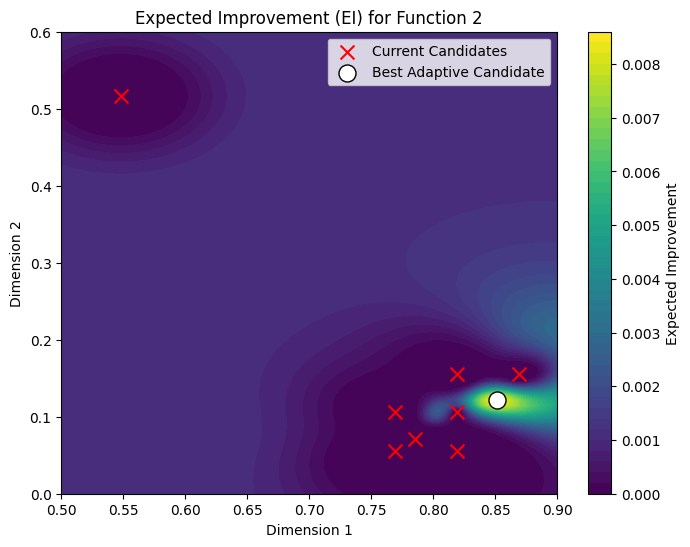

In [ ]:
import numpy as np
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C
import matplotlib.pyplot as plt

# --- Step 1: Load your current candidate data and feedback ---
# (Replace these with your actual data arrays)
X_func2 = np.array([
    [0.818771, 0.105777],
    [0.768771, 0.105777],
    [0.818771, 0.155777],
    [0.818771, 0.055777],
    [0.868771, 0.155777],
    [0.768771, 0.055777],
    [0.547826, 0.516951],
    [0.785411, 0.071446]
])
y_func2 = np.array([
    0.330501724954518,
    0.240251132157092,
    0.2296358864945024,
    0.1333947673139794,
    0.27949105169429433,
    0.18465094916444214,
    0.050578766245406304,
    0.25801443663249457
])

# --- Step 2: Train the GP Surrogate Model ---
kernel = C(1.0, (1e-3, 1e3)) * Matern(length_scale=0.1, nu=2.5)
gp_func2 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gp_func2.fit(X_func2, y_func2)

# --- Step 3: Define the Expected Improvement (EI) Acquisition Function ---
def expected_improvement(X, X_sample, Y_sample, gp, xi=0.01):
    """
    Computes the Expected Improvement at points X based on existing samples (X_sample, Y_sample)
    using a Gaussian process surrogate model.
    """
    mu, sigma = gp.predict(X, return_std=True)
    sigma = sigma.reshape(-1, 1)
    Y_max = np.max(Y_sample)
    with np.errstate(divide='warn'):
        imp = mu.reshape(-1, 1) - Y_max - xi
        Z = imp / sigma
        ei = imp * norm.cdf(Z) + sigma * norm.pdf(Z)
        ei[sigma == 0.0] = 0.0
    return ei

# --- Step 4: Evaluate EI on a Grid and Select the Best Candidate ---
# Define a grid over the domain. Adjust these limits as needed.
x1 = np.linspace(0.5, 0.9, 100)
x2 = np.linspace(0.0, 0.6, 100)
X1, X2 = np.meshgrid(x1, x2)
X_grid = np.column_stack([X1.ravel(), X2.ravel()])

# Compute the Expected Improvement on the grid
ei = expected_improvement(X_grid, X_func2, y_func2, gp_func2, xi=0.01)
best_idx = np.argmax(ei)
best_candidate_adaptive = X_grid[best_idx]
print("Best adaptive candidate:", best_candidate_adaptive)

# --- Optional: Visualize the EI over the grid ---
plt.figure(figsize=(8, 6))
contour = plt.contourf(X1, X2, ei.reshape(X1.shape), levels=50, cmap='viridis')
plt.colorbar(contour, label='Expected Improvement')
plt.scatter(X_func2[:, 0], X_func2[:, 1], color='red', marker='x', s=100, label="Current Candidates")
plt.scatter(best_candidate_adaptive[0], best_candidate_adaptive[1], color='white', edgecolor='black', marker='o', s=150, label="Best Adaptive Candidate")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Expected Improvement (EI) for Function 2")
plt.legend()
plt.show()

In [ ]:
def generate_candidates(best_vec, delta=0.02):
    candidates = {}
    n = best_vec.size
    for i in range(n):
        candidate_plus = best_vec.copy()
        candidate_plus[i] += delta
        candidate_minus = best_vec.copy()
        candidate_minus[i] -= delta
        candidates[f'candidate_plus_dim_{i+1}'] = candidate_plus
        candidates[f'candidate_minus_dim_{i+1}'] = candidate_minus
    candidates['candidate_all_plus'] = best_vec + np.full(best_vec.shape, delta)
    candidates['candidate_all_minus'] = best_vec - np.full(best_vec.shape, delta)
    return candidates

# For Function 1 (2-D) example:
best_vec_func1 = np.array([0.964034, 0.645117])
refined_candidates_func1 = generate_candidates(best_vec_func1, delta=0.02)

In [ ]:
import numpy as np
noise_level = 0.005  # adjust noise level as needed
base_score_func1 = 4.095842e-79  # for Function 1
candidates = generate_candidates(best_vec_func1, delta=0.02)
candidate_points = np.array(list(candidates.values()))
y_candidates = base_score_func1 + np.random.normal(0, noise_level, candidate_points.shape[0])

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C

# Using only the first two dimensions for a 2-D surrogate
gp = GaussianProcessRegressor(kernel=C(1.0, (1e-3, 1e3)) * Matern(length_scale=0.05, nu=2.5),
                              n_restarts_optimizer=5)
gp.fit(candidate_points[:, :2], y_candidates)

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=0.05, nu=2.5),
                         n_restarts_optimizer=5)

In [ ]:
x1 = np.linspace(best_vec_func1[0]-0.1, best_vec_func1[0]+0.1, 50)
x2 = np.linspace(best_vec_func1[1]-0.1, best_vec_func1[1]+0.1, 50)
X1, X2 = np.meshgrid(x1, x2)
X_grid = np.column_stack([X1.ravel(), X2.ravel()])
y_pred, sigma = gp.predict(X_grid, return_std=True)
y_pred = y_pred.reshape(X1.shape)

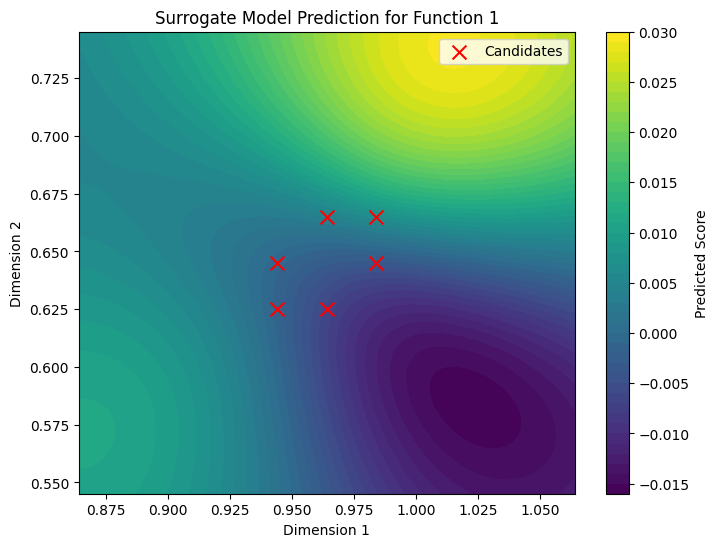

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
contour = plt.contourf(X1, X2, y_pred, levels=50, cmap='viridis')
plt.colorbar(contour, label='Predicted Score')
plt.scatter(candidate_points[:, 0], candidate_points[:, 1], color='red', marker='x', s=100, label='Candidates')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Surrogate Model Prediction for Function 1')
plt.legend()
plt.show()

In [ ]:
def format_candidate(candidate):
    return "-".join([f"{x:.6f}" for x in candidate])

# Assuming we have predicted scores y_pred_candidates for our candidate_points:
y_pred_candidates = gp.predict(candidate_points[:, :2])
best_idx = np.argmax(y_pred_candidates)  # For maximization
best_candidate = candidate_points[best_idx]
print("Best Refined Candidate for Function 1:", format_candidate(best_candidate))

Best Refined Candidate for Function 1: 0.984034-0.665117


In [ ]:
import numpy as np

# Best vector for Function 3 (3-D)
best_vec_func3 = np.array([0.165600, 0.964454, 0.658992])

In [ ]:
def generate_candidates(best_vec, delta=0.02):
    """
    Generate candidate vectors by perturbing each dimension individually,
    plus candidates with all dimensions perturbed.
    Total candidates = 2*n + 2.
    """
    candidates = {}
    n = best_vec.size
    for i in range(n):
        candidate_plus = best_vec.copy()
        candidate_plus[i] += delta
        candidate_minus = best_vec.copy()
        candidate_minus[i] -= delta
        candidates[f'candidate_plus_dim_{i+1}'] = candidate_plus
        candidates[f'candidate_minus_dim_{i+1}'] = candidate_minus
    candidates['candidate_all_plus'] = best_vec + np.full(best_vec.shape, delta)
    candidates['candidate_all_minus'] = best_vec - np.full(best_vec.shape, delta)
    return candidates

# Generate refined candidates for Function 3
refined_candidates_func3 = generate_candidates(best_vec_func3, delta=0.02)

# Print the refined candidate vectors (formatted)
def format_candidate(candidate):
    return "-".join([f"{x:.6f}" for x in candidate])

print("Refined candidates for Function 3 (delta = 0.02):")
for key, vec in refined_candidates_func3.items():
    print(f"{key}: {format_candidate(vec)}")

Refined candidates for Function 3 (delta = 0.02):
candidate_plus_dim_1: 0.185600-0.964454-0.658992
candidate_minus_dim_1: 0.145600-0.964454-0.658992
candidate_plus_dim_2: 0.165600-0.984454-0.658992
candidate_minus_dim_2: 0.165600-0.944454-0.658992
candidate_plus_dim_3: 0.165600-0.964454-0.678992
candidate_minus_dim_3: 0.165600-0.964454-0.638992
candidate_all_plus: 0.185600-0.984454-0.678992
candidate_all_minus: 0.145600-0.944454-0.638992


In [ ]:
base_score_func3 = -0.12070143790768859  # Base feedback score for Function 3

# Convert the dictionary of candidates to an array of candidate vectors
candidate_keys = list(refined_candidates_func3.keys())
candidate_points = np.array([refined_candidates_func3[k] for k in candidate_keys])

# Simulate feedback: base score + small noise
noise_level = 0.005  # Adjust as needed
y_candidates = base_score_func3 + np.random.normal(0, noise_level, candidate_points.shape[0])

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C

# Build the GP surrogate using the first two dimensions of each candidate
gp_func3 = GaussianProcessRegressor(
    kernel=C(1.0, (1e-3, 1e3)) * Matern(length_scale=0.05, nu=2.5),
    n_restarts_optimizer=5
)
gp_func3.fit(candidate_points[:, :2], y_candidates)

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=0.05, nu=2.5),
                         n_restarts_optimizer=5)

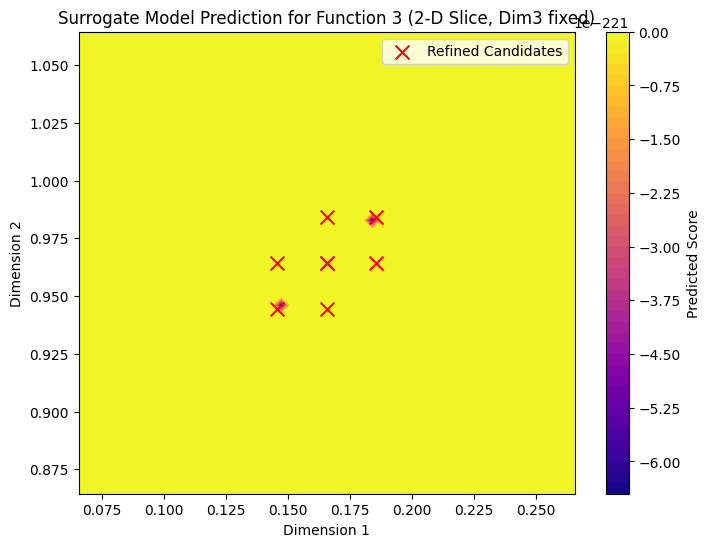

In [ ]:
import matplotlib.pyplot as plt

# Define grid limits around the first two dimensions of best_vec_func3
x1 = np.linspace(best_vec_func3[0] - 0.1, best_vec_func3[0] + 0.1, 50)
x2 = np.linspace(best_vec_func3[1] - 0.1, best_vec_func3[1] + 0.1, 50)
X1, X2 = np.meshgrid(x1, x2)

# Fix the third dimension at the best value
fixed_dim3 = best_vec_func3[2]
X_grid = np.column_stack([X1.ravel(), X2.ravel(), np.full(X1.size, fixed_dim3)])

# For GP prediction, we use only the first two dimensions
y_pred, sigma = gp_func3.predict(X_grid[:, :2], return_std=True)
y_pred = y_pred.reshape(X1.shape)

plt.figure(figsize=(8, 6))
contour = plt.contourf(X1, X2, y_pred, levels=50, cmap='plasma')
plt.colorbar(contour, label='Predicted Score')
plt.scatter(candidate_points[:, 0], candidate_points[:, 1], color='red', marker='x', s=100, label='Refined Candidates')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Surrogate Model Prediction for Function 3 (2-D Slice, Dim3 fixed)')
plt.legend()
plt.show()

In [ ]:
# Predict scores for each refined candidate (first two dimensions)
y_pred_candidates = gp_func3.predict(candidate_points[:, :2])

# Find the index of the best candidate (highest predicted score)
best_idx = np.argmax(y_pred_candidates)
best_candidate = candidate_points[best_idx]
best_score_pred = y_pred_candidates[best_idx]

print("\n=== Function 3 ===")
print("Refined Candidates -> Predicted Scores:")
for i, key in enumerate(candidate_keys):
    print(f"  {key}: {format_candidate(candidate_points[i])} -> {y_pred_candidates[i]:.5f}")
print(f"Best Candidate: {format_candidate(best_candidate)} with Predicted Score: {best_score_pred:.5f}")


=== Function 3 ===
Refined Candidates -> Predicted Scores:
  candidate_plus_dim_1: 0.185600-0.964454-0.658992 -> -0.11655
  candidate_minus_dim_1: 0.145600-0.964454-0.658992 -> -0.12353
  candidate_plus_dim_2: 0.165600-0.984454-0.658992 -> -0.12627
  candidate_minus_dim_2: 0.165600-0.944454-0.658992 -> -0.11684
  candidate_plus_dim_3: 0.165600-0.964454-0.678992 -> -0.11891
  candidate_minus_dim_3: 0.165600-0.964454-0.638992 -> -0.11891
  candidate_all_plus: 0.185600-0.984454-0.678992 -> -0.11841
  candidate_all_minus: 0.145600-0.944454-0.638992 -> -0.11240
Best Candidate: 0.145600-0.944454-0.638992 with Predicted Score: -0.11240


In [ ]:
import numpy as np

# Best vector and base score for Function 4
best_vec_func4 = np.array([0.979363, 0.440618, 0.632742, 0.573562])
base_score_func4 = -19.898007433757943  # Base feedback score for Function 4

In [ ]:
def generate_candidates(best_vec, delta=0.02):
    candidates = {}
    n = best_vec.size
    for i in range(n):
        candidate_plus = best_vec.copy()
        candidate_plus[i] += delta
        candidate_minus = best_vec.copy()
        candidate_minus[i] -= delta
        candidates[f'candidate_plus_dim_{i+1}'] = candidate_plus
        candidates[f'candidate_minus_dim_{i+1}'] = candidate_minus
    candidates['candidate_all_plus'] = best_vec + np.full(best_vec.shape, delta)
    candidates['candidate_all_minus'] = best_vec - np.full(best_vec.shape, delta)
    return candidates

refined_candidates_func4 = generate_candidates(best_vec_func4, delta=0.02)

def format_candidate(candidate):
    return "-".join([f"{x:.6f}" for x in candidate])

print("Refined candidates for Function 4 (delta = 0.02):")
for key, vec in refined_candidates_func4.items():
    print(f"{key}: {format_candidate(vec)}")

Refined candidates for Function 4 (delta = 0.02):
candidate_plus_dim_1: 0.999363-0.440618-0.632742-0.573562
candidate_minus_dim_1: 0.959363-0.440618-0.632742-0.573562
candidate_plus_dim_2: 0.979363-0.460618-0.632742-0.573562
candidate_minus_dim_2: 0.979363-0.420618-0.632742-0.573562
candidate_plus_dim_3: 0.979363-0.440618-0.652742-0.573562
candidate_minus_dim_3: 0.979363-0.440618-0.612742-0.573562
candidate_plus_dim_4: 0.979363-0.440618-0.632742-0.593562
candidate_minus_dim_4: 0.979363-0.440618-0.632742-0.553562
candidate_all_plus: 0.999363-0.460618-0.652742-0.593562
candidate_all_minus: 0.959363-0.420618-0.612742-0.553562


In [ ]:
# Convert refined candidates to an array
candidate_keys = list(refined_candidates_func4.keys())
candidate_points = np.array([refined_candidates_func4[k] for k in candidate_keys])

# Simulate feedback: base score plus small noise
noise_level = 0.005  # Adjust noise level as needed
y_candidates = base_score_func4 + np.random.normal(0, noise_level, candidate_points.shape[0])

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C

gp_func4 = GaussianProcessRegressor(kernel=C(1.0, (1e-3, 1e3)) * Matern(length_scale=0.05, nu=2.5),
                                    n_restarts_optimizer=5)
# Use only the first two dimensions
gp_func4.fit(candidate_points[:, :2], y_candidates)

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=0.05, nu=2.5),
                         n_restarts_optimizer=5)

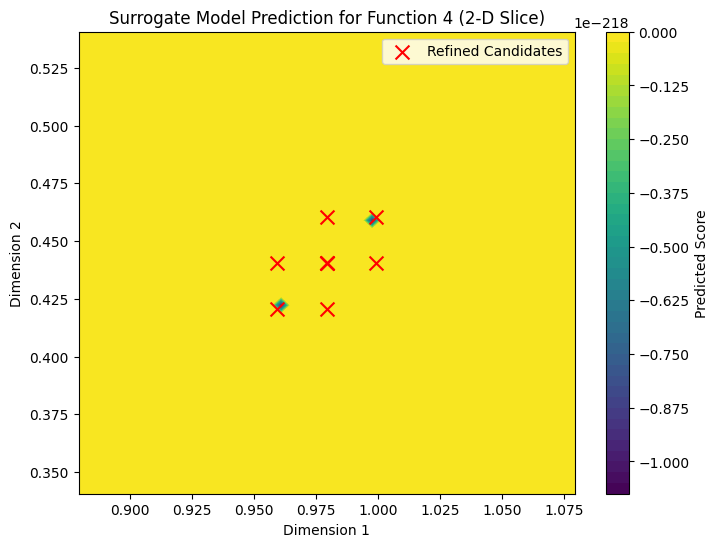

In [ ]:
import matplotlib.pyplot as plt

# Define grid limits around the first two dimensions of best_vec_func4
x1 = np.linspace(best_vec_func4[0] - 0.1, best_vec_func4[0] + 0.1, 50)
x2 = np.linspace(best_vec_func4[1] - 0.1, best_vec_func4[1] + 0.1, 50)
X1, X2 = np.meshgrid(x1, x2)

# For 4-D functions, we fix dimensions 3 and 4 at their best values.
fixed_dims = best_vec_func4[2:]
# Create grid points: for each (x1, x2) pair, append the fixed dimensions.
X_grid = np.array([np.concatenate(([x1_val, x2_val], fixed_dims)) for x1_val, x2_val in zip(X1.ravel(), X2.ravel())])

# Predict using the GP surrogate (using only the first two dims)
y_pred, sigma = gp_func4.predict(X_grid[:, :2], return_std=True)
y_pred = y_pred.reshape(X1.shape)

plt.figure(figsize=(8, 6))
contour = plt.contourf(X1, X2, y_pred, levels=50, cmap='viridis')
plt.colorbar(contour, label='Predicted Score')
plt.scatter(candidate_points[:, 0], candidate_points[:, 1], color='red', marker='x', s=100, label='Refined Candidates')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Surrogate Model Prediction for Function 4 (2-D Slice)')
plt.legend()
plt.show()

In [ ]:
# Predict scores for each refined candidate (using the first two dimensions)
y_pred_candidates = gp_func4.predict(candidate_points[:, :2])
best_idx = np.argmax(y_pred_candidates)  # For maximization
best_candidate = candidate_points[best_idx]
best_score_pred = y_pred_candidates[best_idx]

print("\n=== Function 4 ===")
print("Refined Candidates -> Predicted Scores:")
for i, key in enumerate(candidate_keys):
    print(f"  {key}: {format_candidate(candidate_points[i])} -> {y_pred_candidates[i]:.5f}")
print(f"Best Candidate: {format_candidate(best_candidate)} with Predicted Score: {best_score_pred:.5f}")


=== Function 4 ===
Refined Candidates -> Predicted Scores:
  candidate_plus_dim_1: 0.999363-0.440618-0.632742-0.573562 -> -19.89521
  candidate_minus_dim_1: 0.959363-0.440618-0.632742-0.573562 -> -19.89523
  candidate_plus_dim_2: 0.979363-0.460618-0.632742-0.573562 -> -19.90574
  candidate_minus_dim_2: 0.979363-0.420618-0.632742-0.573562 -> -19.89804
  candidate_plus_dim_3: 0.979363-0.440618-0.652742-0.573562 -> -19.89593
  candidate_minus_dim_3: 0.979363-0.440618-0.612742-0.573562 -> -19.89593
  candidate_plus_dim_4: 0.979363-0.440618-0.632742-0.593562 -> -19.89593
  candidate_minus_dim_4: 0.979363-0.440618-0.632742-0.553562 -> -19.89593
  candidate_all_plus: 0.999363-0.460618-0.652742-0.593562 -> -19.89778
  candidate_all_minus: 0.959363-0.420618-0.612742-0.553562 -> -19.90641
Best Candidate: 0.999363-0.440618-0.632742-0.573562 with Predicted Score: -19.89521


In [ ]:
import numpy as np

# Define best vector and base score for Function 5
best_vec_func5 = np.array([0.290636, 0.824504, 0.580542, 0.368022])
base_score_func5 = 13.377756436400528
delta = 0.02
noise_level = 0.005

# Generate refined candidates using our helper function
def generate_candidates(best_vec, delta=0.02):
    candidates = {}
    n = best_vec.size
    for i in range(n):
        candidate_plus = best_vec.copy()
        candidate_plus[i] += delta
        candidate_minus = best_vec.copy()
        candidate_minus[i] -= delta
        candidates[f'candidate_plus_dim_{i+1}'] = candidate_plus
        candidates[f'candidate_minus_dim_{i+1}'] = candidate_minus
    candidates['candidate_all_plus'] = best_vec + np.full(best_vec.shape, delta)
    candidates['candidate_all_minus'] = best_vec - np.full(best_vec.shape, delta)
    return candidates

candidates_func5 = generate_candidates(best_vec_func5, delta=delta)

# Simulate feedback for each candidate (for demonstration)
candidate_points = np.array(list(candidates_func5.values()))
y_candidates = base_score_func5 + np.random.normal(0, noise_level, candidate_points.shape[0])

# Train a Gaussian Process surrogate (using first two dimensions)
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C

gp = GaussianProcessRegressor(kernel=C(1.0, (1e-3, 1e3)) * Matern(length_scale=0.05, nu=2.5),
                              n_restarts_optimizer=5)
gp.fit(candidate_points[:, :2], y_candidates)

# Predict scores for each candidate
y_pred_candidates = gp.predict(candidate_points[:, :2])
best_idx = np.argmax(y_pred_candidates)
best_candidate = candidate_points[best_idx]

# Format candidate for submission
def format_candidate(candidate):
    return "-".join([f"{x:.6f}" for x in candidate])

print("Best Refined Candidate for Function 5:", format_candidate(best_candidate))
print("Predicted Score:", y_pred_candidates[best_idx])

Best Refined Candidate for Function 5: 0.310636-0.844504-0.600542-0.388022
Predicted Score: 13.383151631992014


/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


In [ ]:
import numpy as np

# Best vector for Function 8 (8-D)
best_vec_func8 = np.array([0.256820, 0.180489, 0.295402, 0.830171, 0.672892, 0.287181, 0.913031, 0.782776])
base_score_func8 = 8.3316420728934  # Base feedback score for Function 8
delta = 0.02  # Refinement perturbation
noise_level = 0.005  # Noise level for simulating feedback

In [ ]:
def generate_candidates(best_vec, delta=0.02):
    candidates = {}
    n = best_vec.size
    for i in range(n):
        candidate_plus = best_vec.copy()
        candidate_plus[i] += delta
        candidate_minus = best_vec.copy()
        candidate_minus[i] -= delta
        candidates[f'candidate_plus_dim_{i+1}'] = candidate_plus
        candidates[f'candidate_minus_dim_{i+1}'] = candidate_minus
    candidates['candidate_all_plus'] = best_vec + np.full(best_vec.shape, delta)
    candidates['candidate_all_minus'] = best_vec - np.full(best_vec.shape, delta)
    return candidates

candidates_func8 = generate_candidates(best_vec_func8, delta=delta)
# Convert the dictionary values to a NumPy array of candidate vectors
candidate_points = np.array(list(candidates_func8.values()))

In [ ]:
y_candidates = base_score_func8 + np.random.normal(0, noise_level, candidate_points.shape[0])

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C

gp_func8 = GaussianProcessRegressor(kernel=C(1.0, (1e-3, 1e3)) * Matern(length_scale=0.05, nu=2.5),
                                    n_restarts_optimizer=5)
# Use only the first two dimensions for GP training:
gp_func8.fit(candidate_points[:, :2], y_candidates)

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=0.05, nu=2.5),
                         n_restarts_optimizer=5)

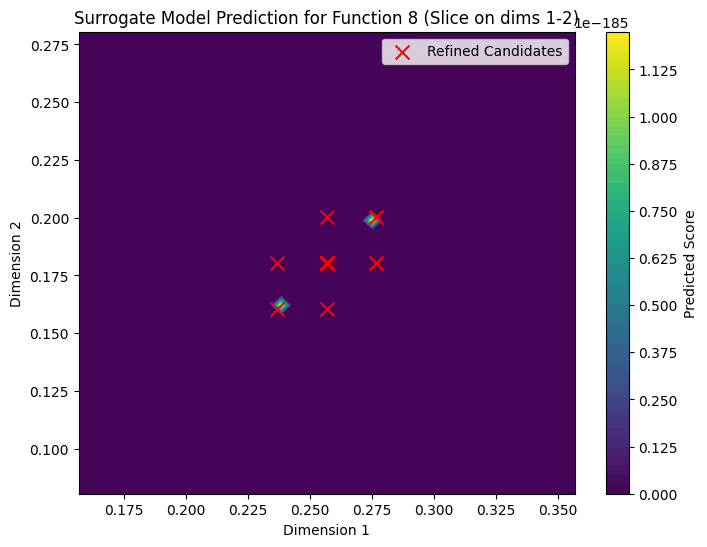

In [ ]:
import matplotlib.pyplot as plt

# Define grid limits around the best vector's first two dimensions
x1 = np.linspace(best_vec_func8[0]-0.1, best_vec_func8[0]+0.1, 50)
x2 = np.linspace(best_vec_func8[1]-0.1, best_vec_func8[1]+0.1, 50)
X1, X2 = np.meshgrid(x1, x2)
X_grid = np.column_stack([X1.ravel(), X2.ravel()])

y_pred, sigma = gp_func8.predict(X_grid, return_std=True)
y_pred = y_pred.reshape(X1.shape)

plt.figure(figsize=(8, 6))
contour = plt.contourf(X1, X2, y_pred, levels=50, cmap='viridis')
plt.colorbar(contour, label='Predicted Score')
plt.scatter(candidate_points[:, 0], candidate_points[:, 1], color='red', marker='x', s=100, label='Refined Candidates')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Surrogate Model Prediction for Function 8 (Slice on dims 1-2)')
plt.legend()
plt.show()

In [ ]:
# Predict the scores for each candidate using the GP (on first 2 dims)
y_pred_candidates = gp_func8.predict(candidate_points[:, :2])
best_idx = np.argmax(y_pred_candidates)
best_candidate = candidate_points[best_idx]

def format_candidate(candidate):
    return "-".join([f"{x:.6f}" for x in candidate])

print("Best Refined Candidate for Function 8:", format_candidate(best_candidate))
print("Predicted Score:", y_pred_candidates[best_idx])

Best Refined Candidate for Function 8: 0.236820-0.180489-0.295402-0.830171-0.672892-0.287181-0.913031-0.782776
Predicted Score: 8.340791711259358


In [ ]:
from sklearn.model_selection import KFold, cross_val_score

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: Convergenc

Cross-validation scores (negative MSE): [-4.68687489e-05 -1.42873612e-05 -3.18656242e-05]
Mean CV score (negative MSE): -3.1007244780078066e-05


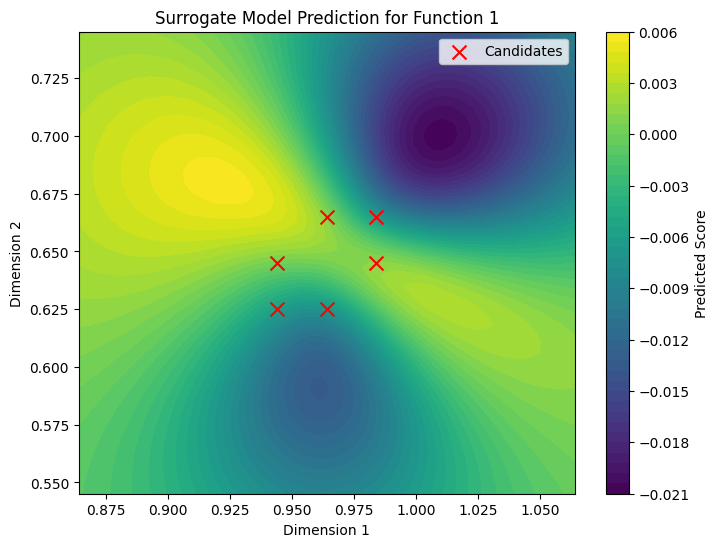

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C
from sklearn.model_selection import KFold, cross_val_score

# Assume best_vec_func1 and generate_candidates are already defined:
best_vec_func1 = np.array([0.964034, 0.645117])
delta = 0.02
candidates = generate_candidates(best_vec_func1, delta=delta)
candidate_points = np.array(list(candidates.values()))

# Simulate feedback scores for Function 1 (base score plus noise)
noise_level = 0.005
base_score_func1 = 4.095842e-79
y_candidates = base_score_func1 + np.random.normal(0, noise_level, candidate_points.shape[0])

# Build the Gaussian Process surrogate model
gp = GaussianProcessRegressor(
    kernel=C(1.0, (1e-3, 1e3)) * Matern(length_scale=0.05, nu=2.5),
    n_restarts_optimizer=5
)
gp.fit(candidate_points[:, :2], y_candidates)

# Implement 3-Fold Cross-Validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)
cv_scores = cross_val_score(gp, candidate_points[:, :2], y_candidates, cv=cv, scoring='neg_mean_squared_error')
print("Cross-validation scores (negative MSE):", cv_scores)
print("Mean CV score (negative MSE):", cv_scores.mean())

# Create a grid for visualization
x1 = np.linspace(best_vec_func1[0]-0.1, best_vec_func1[0]+0.1, 50)
x2 = np.linspace(best_vec_func1[1]-0.1, best_vec_func1[1]+0.1, 50)
X1, X2 = np.meshgrid(x1, x2)
X_grid = np.column_stack([X1.ravel(), X2.ravel()])
y_pred, sigma = gp.predict(X_grid, return_std=True)
y_pred = y_pred.reshape(X1.shape)

# Plot the surrogate model's predictions
plt.figure(figsize=(8,6))
contour = plt.contourf(X1, X2, y_pred, levels=50, cmap='viridis')
plt.colorbar(contour, label='Predicted Score')
plt.scatter(candidate_points[:, 0], candidate_points[:, 1], color='red', marker='x', s=100, label='Candidates')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Surrogate Model Prediction for Function 1')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: Convergenc

Cross-validation scores (negative MSE): [-8.90033187e-06 -1.83334151e-05 -1.80658622e-05]
Mean CV score (negative MSE): -1.5099869709524915e-05


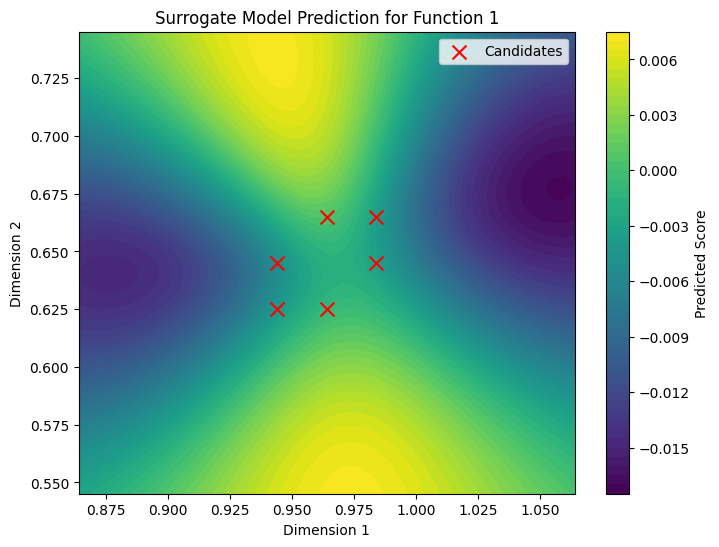

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C
from sklearn.model_selection import KFold, cross_val_score

# Helper function: Generate candidate vectors by perturbing each dimension.
def generate_candidates(best_vec, delta=0.02):
    candidates = {}
    n = best_vec.size
    for i in range(n):
        candidate_plus = best_vec.copy()
        candidate_plus[i] += delta
        candidate_minus = best_vec.copy()
        candidate_minus[i] -= delta
        candidates[f'candidate_plus_dim_{i+1}'] = candidate_plus
        candidates[f'candidate_minus_dim_{i+1}'] = candidate_minus
    candidates['candidate_all_plus'] = best_vec + np.full(best_vec.shape, delta)
    candidates['candidate_all_minus'] = best_vec - np.full(best_vec.shape, delta)
    return candidates

# Define the best vector for Function 1 (2-D)
best_vec_func1 = np.array([0.964034, 0.645117])
delta = 0.02

# Generate refined candidates for Function 1
candidates = generate_candidates(best_vec_func1, delta=delta)
candidate_points = np.array(list(candidates.values()))

# Simulate feedback scores for Function 1: base score plus a small noise
noise_level = 0.005
base_score_func1 = 4.095842e-79
y_candidates = base_score_func1 + np.random.normal(0, noise_level, candidate_points.shape[0])

# Build the Gaussian Process surrogate model using a Matern kernel
gp = GaussianProcessRegressor(
    kernel=C(1.0, (1e-3, 1e3)) * Matern(length_scale=0.05, nu=2.5),
    n_restarts_optimizer=5
)
# Since Function 1 is 2-D, we use all dimensions
gp.fit(candidate_points[:, :2], y_candidates)

# Implement 3-Fold Cross-Validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)
cv_scores = cross_val_score(gp, candidate_points[:, :2], y_candidates, cv=cv, scoring='neg_mean_squared_error')
print("Cross-validation scores (negative MSE):", cv_scores)
print("Mean CV score (negative MSE):", cv_scores.mean())

# Create a grid for visualization around the best vector
x1 = np.linspace(best_vec_func1[0] - 0.1, best_vec_func1[0] + 0.1, 50)
x2 = np.linspace(best_vec_func1[1] - 0.1, best_vec_func1[1] + 0.1, 50)
X1, X2 = np.meshgrid(x1, x2)
X_grid = np.column_stack([X1.ravel(), X2.ravel()])

# Predict the surrogate model on the grid
y_pred, sigma = gp.predict(X_grid, return_std=True)
y_pred = y_pred.reshape(X1.shape)

# Plot the surrogate model's predictions as a contour map
plt.figure(figsize=(8, 6))
contour = plt.contourf(X1, X2, y_pred, levels=50, cmap='viridis')
plt.colorbar(contour, label='Predicted Score')
plt.scatter(candidate_points[:, 0], candidate_points[:, 1], color='red', marker='x', s=100, label='Candidates')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Surrogate Model Prediction for Function 1')
plt.legend()
plt.show()

In [ ]:
from scipy.stats import norm

def expected_improvement(X, gp, y_best, xi=0.01):
    """
    Compute the EI at points X based on existing surrogate model in gp
    and previously observed best objective y_best.
    xi: exploitation-exploration trade-off parameter
    """
    mu, sigma = gp.predict(X, return_std=True)
    # For numerical stability
    sigma = sigma.reshape(-1, 1)
    mu = mu.reshape(-1, 1)
    # Compute improvement
    with np.errstate(divide='warn'):
        Z = (mu - y_best - xi) / sigma
        ei = (mu - y_best - xi) * norm.cdf(Z) + sigma * norm.pdf(Z)
        ei[sigma == 0.0] = 0.0
    return ei.ravel()

# Example usage after you fit gp:
y_best = np.max(y_candidates)  # your current best score
X_ei = X_grid  # same grid as used for visualization
ei_values = expected_improvement(X_ei, gp, y_best)
best_ei_idx = np.argmax(ei_values)
best_ei_point = X_ei[best_ei_idx]
print("Best next point by EI:", best_ei_point)

Best next point by EI: [0.92525849 0.745117  ]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C
from sklearn.model_selection import KFold, cross_val_score

# Helper function: generate refined candidate vectors
def generate_candidates(best_vec, delta=0.02):
    candidates = {}
    n = best_vec.size
    for i in range(n):
        candidate_plus = best_vec.copy()
        candidate_plus[i] += delta
        candidate_minus = best_vec.copy()
        candidate_minus[i] -= delta
        candidates[f'candidate_plus_dim_{i+1}'] = candidate_plus
        candidates[f'candidate_minus_dim_{i+1}'] = candidate_minus
    candidates['candidate_all_plus'] = best_vec + np.full(best_vec.shape, delta)
    candidates['candidate_all_minus'] = best_vec - np.full(best_vec.shape, delta)
    return candidates

# Helper function: format candidate vector for printing
def format_candidate(candidate):
    return "-".join([f"{x:.6f}" for x in candidate])

# Define best vectors (from your previous submission) for each function you want to improve
best_vectors = {
    "Function 1": np.array([0.964034, 0.645117]),                           # 2-D
    "Function 3": np.array([0.165600, 0.964454, 0.658992]),                 # 3-D
    "Function 4": np.array([0.979363, 0.440618, 0.632742, 0.573562]),         # 4-D
    "Function 6": np.array([0.384874, 0.421523, 0.115493, 0.592513, 0.477029]),# 5-D
    "Function 7": np.array([0.284835, 0.595316, 0.870015, 0.477555, 0.872324, 0.778193])  # 6-D
}

# Define base scores (feedback from previous submission)
base_scores = {
    "Function 1": 4.095842e-79,
    "Function 3": -0.12070143790768859,
    "Function 4": -19.898007433757943,
    "Function 6": -1.2131765659551683,
    "Function 7": 0.03693303535157962
}

# Noise level to simulate small feedback variations
noise_level = 0.005

# List of functions to improve
functions_to_improve = list(best_vectors.keys())

# Loop over each function
for func in functions_to_improve:
    print(f"\n=== Processing {func} ===")
    best_vec = best_vectors[func]
    base_score = base_scores[func]

    # 1. Generate refined candidates
    candidates = generate_candidates(best_vec, delta=0.02)
    candidate_keys = list(candidates.keys())
    candidate_points = np.array([candidates[k] for k in candidate_keys])

    # 2. Simulate feedback: base score plus small random noise
    y_candidates = base_score + np.random.normal(0, noise_level, size=candidate_points.shape[0])

    # 3. Build the Gaussian Process surrogate model
    # Use only the first 2 dimensions for training (for visualization)
    if best_vec.size == 2:
        X_train = candidate_points
    else:
        X_train = candidate_points[:, :2]

    gp = GaussianProcessRegressor(
        kernel=C(1.0, (1e-3, 1e3)) * Matern(length_scale=0.05, nu=2.5),
        n_restarts_optimizer=5
    )
    gp.fit(X_train, y_candidates)

    # 4. Predict candidate scores and select the best candidate (maximization)
    y_pred_candidates = gp.predict(X_train)
    best_idx = np.argmax(y_pred_candidates)
    best_candidate = candidate_points[best_idx]

    # 5. Print out candidate information
    print("Refined Candidates and Predicted Scores:")
    for i, key in enumerate(candidate_keys):
        print(f"  {key}: {format_candidate(candidate_points[i])} -> {y_pred_candidates[i]:.5f}")
    print(f"Best Candidate for {func}: {format_candidate(best_candidate)} with Predicted Score: {y_pred_candidates[best_idx]:.5f}")

    # 6. Optional: Cross-validation on the GP model (using 3-fold CV)
    cv = KFold(n_splits=3, shuffle=True, random_state=42)
    cv_scores = cross_val_score(gp, X_train, y_candidates, cv=cv, scoring='neg_mean_squared_error')
    print("Cross-validation scores (negative MSE):", cv_scores)
    print("Mean CV score (negative MSE):", cv_scores.mean())

    # 7. Optional: Visualize the surrogate model's response
    # Create a grid around the best vector in the first two dimensions
    d1_min, d1_max = best_vec[0] - 0.1, best_vec[0] + 0.1
    d2_min, d2_max = best_vec[1] - 0.1, best_vec[1] + 0.1
    x1 = np.linspace(d1_min, d1_max, 50)



=== Processing Function 1 ===
Refined Candidates and Predicted Scores:
  candidate_plus_dim_1: 0.984034-0.645117 -> -0.00861
  candidate_minus_dim_1: 0.944034-0.645117 -> 0.00967
  candidate_plus_dim_2: 0.964034-0.665117 -> -0.00560
  candidate_minus_dim_2: 0.964034-0.625117 -> -0.00071
  candidate_all_plus: 0.984034-0.665117 -> -0.00388
  candidate_all_minus: 0.944034-0.625117 -> 0.00204
Best Candidate for Function 1: 0.944034-0.645117 with Predicted Score: 0.00967


/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: Convergenc

Cross-validation scores (negative MSE): [-8.14695781e-05 -6.88238400e-05 -4.65775998e-05]
Mean CV score (negative MSE): -6.562367260647226e-05

=== Processing Function 3 ===
Refined Candidates and Predicted Scores:
  candidate_plus_dim_1: 0.185600-0.964454-0.658992 -> -0.11669
  candidate_minus_dim_1: 0.145600-0.964454-0.658992 -> -0.12459
  candidate_plus_dim_2: 0.165600-0.984454-0.658992 -> -0.10726
  candidate_minus_dim_2: 0.165600-0.944454-0.658992 -> -0.12515
  candidate_plus_dim_3: 0.165600-0.964454-0.678992 -> -0.12165
  candidate_minus_dim_3: 0.165600-0.964454-0.638992 -> -0.12165
  candidate_all_plus: 0.185600-0.984454-0.678992 -> -0.12273
  candidate_all_minus: 0.145600-0.944454-0.638992 -> -0.11793
Best Candidate for Function 3: 0.165600-0.984454-0.658992 with Predicted Score: -0.10726


/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)

Cross-validation scores (negative MSE): [-0.00015786 -0.00015524 -0.01536206]
Mean CV score (negative MSE): -0.00522505500439031

=== Processing Function 4 ===
Refined Candidates and Predicted Scores:
  candidate_plus_dim_1: 0.999363-0.440618-0.632742-0.573562 -> -19.90156
  candidate_minus_dim_1: 0.959363-0.440618-0.632742-0.573562 -> -19.89714
  candidate_plus_dim_2: 0.979363-0.460618-0.632742-0.573562 -> -19.89941
  candidate_minus_dim_2: 0.979363-0.420618-0.632742-0.573562 -> -19.89997
  candidate_plus_dim_3: 0.979363-0.440618-0.652742-0.573562 -> -19.89583
  candidate_minus_dim_3: 0.979363-0.440618-0.612742-0.573562 -> -19.89583
  candidate_plus_dim_4: 0.979363-0.440618-0.632742-0.593562 -> -19.89583
  candidate_minus_dim_4: 0.979363-0.440618-0.632742-0.553562 -> -19.89583
  candidate_all_plus: 0.999363-0.460618-0.652742-0.593562 -> -19.90517
  candidate_all_minus: 0.959363-0.420618-0.612742-0.553562 -> -19.89681
Best Candidate for Function 4: 0.979363-0.440618-0.652742-0.573562 w

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_r

Cross-validation scores (negative MSE): [-5.29957261e-05 -2.63956409e+02 -1.06707418e-04]
Mean CV score (negative MSE): -87.98552287476956

=== Processing Function 6 ===


/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Refined Candidates and Predicted Scores:
  candidate_plus_dim_1: 0.404874-0.421523-0.115493-0.592513-0.477029 -> -1.21269
  candidate_minus_dim_1: 0.364874-0.421523-0.115493-0.592513-0.477029 -> -1.21235
  candidate_plus_dim_2: 0.384874-0.441523-0.115493-0.592513-0.477029 -> -1.22300
  candidate_minus_dim_2: 0.384874-0.401523-0.115493-0.592513-0.477029 -> -1.22132
  candidate_plus_dim_3: 0.384874-0.421523-0.135493-0.592513-0.477029 -> -1.21200
  candidate_minus_dim_3: 0.384874-0.421523-0.095493-0.592513-0.477029 -> -1.21200
  candidate_plus_dim_4: 0.384874-0.421523-0.115493-0.612513-0.477029 -> -1.21200
  candidate_minus_dim_4: 0.384874-0.421523-0.115493-0.572513-0.477029 -> -1.21200
  candidate_plus_dim_5: 0.384874-0.421523-0.115493-0.592513-0.497029 -> -1.21200
  candidate_minus_dim_5: 0.384874-0.421523-0.115493-0.592513-0.457029 -> -1.21200
  candidate_all_plus: 0.404874-0.441523-0.135493-0.612513-0.497029 -> -1.20961
  candidate_all_minus: 0.364874-0.401523-0.095493-0.572513-0.4570

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)

Cross-validation scores (negative MSE): [-3.83016211e-05 -1.11090482e+00 -3.72914239e-01]
Mean CV score (negative MSE): -0.49461911891083105

=== Processing Function 7 ===


/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)

Refined Candidates and Predicted Scores:
  candidate_plus_dim_1: 0.304835-0.595316-0.870015-0.477555-0.872324-0.778193 -> 0.03758
  candidate_minus_dim_1: 0.264835-0.595316-0.870015-0.477555-0.872324-0.778193 -> 0.03507
  candidate_plus_dim_2: 0.284835-0.615316-0.870015-0.477555-0.872324-0.778193 -> 0.03764
  candidate_minus_dim_2: 0.284835-0.575316-0.870015-0.477555-0.872324-0.778193 -> 0.04387
  candidate_plus_dim_3: 0.284835-0.595316-0.890015-0.477555-0.872324-0.778193 -> 0.03505
  candidate_minus_dim_3: 0.284835-0.595316-0.850015-0.477555-0.872324-0.778193 -> 0.03505
  candidate_plus_dim_4: 0.284835-0.595316-0.870015-0.497555-0.872324-0.778193 -> 0.03505
  candidate_minus_dim_4: 0.284835-0.595316-0.870015-0.457555-0.872324-0.778193 -> 0.03505
  candidate_plus_dim_5: 0.284835-0.595316-0.870015-0.477555-0.892324-0.778193 -> 0.03505
  candidate_minus_dim_5: 0.284835-0.595316-0.870015-0.477555-0.852324-0.778193 -> 0.03505
  candidate_plus_dim_6: 0.284835-0.595316-0.870015-0.477555-0.87

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)

Cross-validation scores (negative MSE): [-6.99073648e-04 -9.00284241e-04 -1.12341531e-05]
Mean CV score (negative MSE): -0.0005368640141701251


In [ ]:
# Create a grid for visualization around the best vector in the first two dimensions
d1_min, d1_max = best_vec_func1[0] - 0.1, best_vec_func1[0] + 0.1
d2_min, d2_max = best_vec_func1[1] - 0.1, best_vec_func1[1] + 0.1
x1 = np.linspace(d1_min, d1_max, 50)
x2 = np.linspace(d2_min, d2_max, 50)
X1, X2 = np.meshgrid(x1, x2)
X_grid = np.column_stack([X1.ravel(), X2.ravel()])

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: Convergenc

Function 1 Cross-validation scores (negative MSE): [-6.31879558e-05 -5.50184639e-05 -5.71472378e-05]
Function 1 Mean CV score (negative MSE): -5.8451219134706176e-05


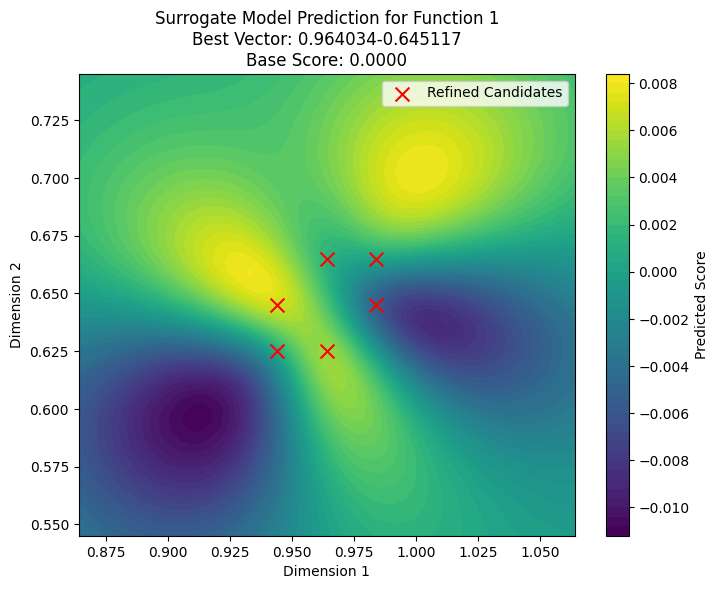


=== Function 1 Refined Candidates and Predicted Scores ===
candidate_plus_dim_1: 0.984034-0.645117 -> -0.00528
candidate_minus_dim_1: 0.944034-0.645117 -> 0.00691
candidate_plus_dim_2: 0.964034-0.665117 -> 0.00136
candidate_minus_dim_2: 0.964034-0.625117 -> 0.00532
candidate_all_plus: 0.984034-0.665117 -> 0.00015
candidate_all_minus: 0.944034-0.625117 -> 0.00059
Best Candidate for Function 1: 0.944034-0.645117 with Predicted Score: 0.00691



/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Function 3 Cross-validation scores (negative MSE): [-6.09853552e-05 -1.27947864e-04 -9.73196932e-05]
Function 3 Mean CV score (negative MSE): -9.541763739716353e-05


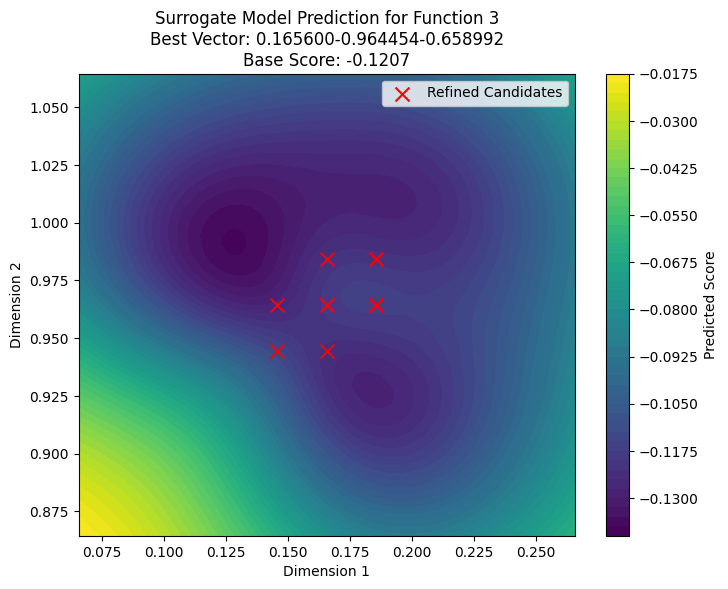


=== Function 3 Refined Candidates and Predicted Scores ===
candidate_plus_dim_1: 0.185600-0.964454-0.658992 -> -0.11673
candidate_minus_dim_1: 0.145600-0.964454-0.658992 -> -0.12672
candidate_plus_dim_2: 0.165600-0.984454-0.658992 -> -0.12264
candidate_minus_dim_2: 0.165600-0.944454-0.658992 -> -0.12332
candidate_plus_dim_3: 0.165600-0.964454-0.678992 -> -0.11921
candidate_minus_dim_3: 0.165600-0.964454-0.638992 -> -0.11921
candidate_all_plus: 0.185600-0.984454-0.678992 -> -0.12134
candidate_all_minus: 0.145600-0.944454-0.638992 -> -0.11455
Best Candidate for Function 3: 0.145600-0.944454-0.638992 with Predicted Score: -0.11455



/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Function 4 Cross-validation scores (negative MSE): [-8.97747863e-05 -1.38674435e-05 -1.93876717e-05]
Function 4 Mean CV score (negative MSE): -4.100996716597832e-05


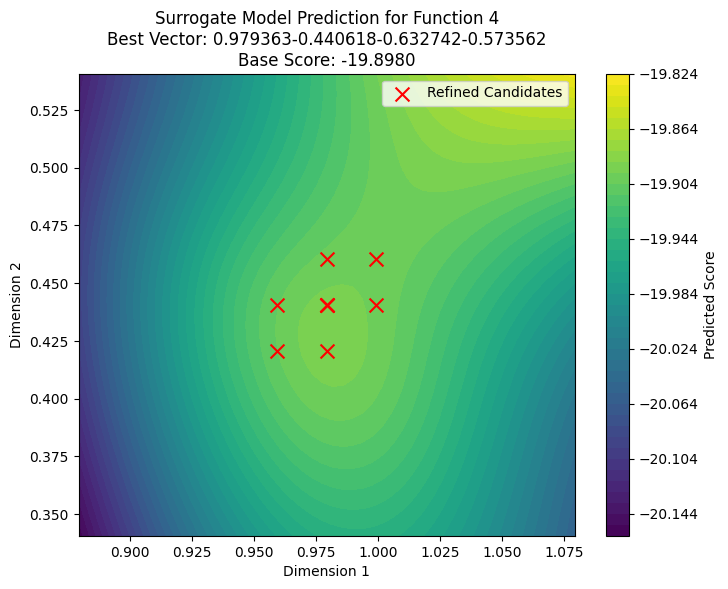


=== Function 4 Refined Candidates and Predicted Scores ===
candidate_plus_dim_1: 0.999363-0.440618-0.632742-0.573562 -> -19.89827
candidate_minus_dim_1: 0.959363-0.440618-0.632742-0.573562 -> -19.90490
candidate_plus_dim_2: 0.979363-0.460618-0.632742-0.573562 -> -19.90170
candidate_minus_dim_2: 0.979363-0.420618-0.632742-0.573562 -> -19.89190
candidate_plus_dim_3: 0.979363-0.440618-0.652742-0.573562 -> -19.89366
candidate_minus_dim_3: 0.979363-0.440618-0.612742-0.573562 -> -19.89366
candidate_plus_dim_4: 0.979363-0.440618-0.632742-0.593562 -> -19.89366
candidate_minus_dim_4: 0.979363-0.440618-0.632742-0.553562 -> -19.89366
candidate_all_plus: 0.999363-0.460618-0.652742-0.593562 -> -19.89933
candidate_all_minus: 0.959363-0.420618-0.612742-0.553562 -> -19.90435
Best Candidate for Function 4: 0.979363-0.420618-0.632742-0.573562 with Predicted Score: -19.89190



/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

Function 6 Cross-validation scores (negative MSE): [-0.73612835 -1.1109231  -0.36765602]
Function 6 Mean CV score (negative MSE): -0.7382358214113635


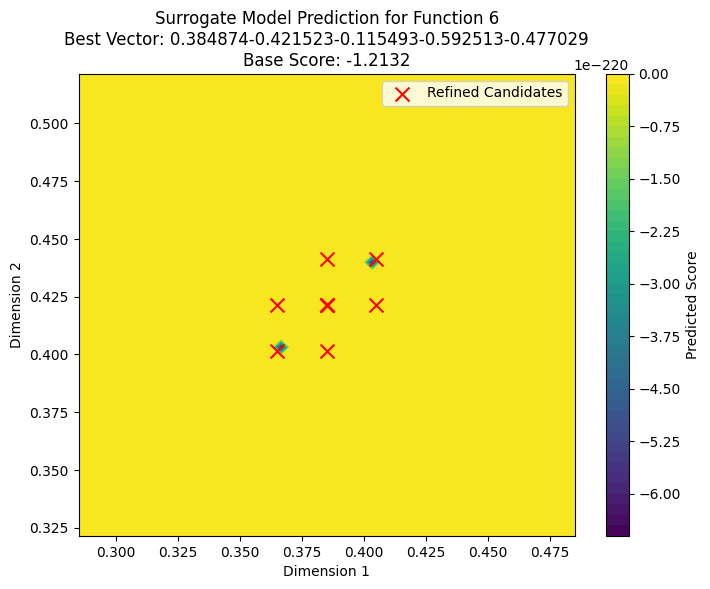


=== Function 6 Refined Candidates and Predicted Scores ===
candidate_plus_dim_1: 0.404874-0.421523-0.115493-0.592513-0.477029 -> -1.21108
candidate_minus_dim_1: 0.364874-0.421523-0.115493-0.592513-0.477029 -> -1.21590
candidate_plus_dim_2: 0.384874-0.441523-0.115493-0.592513-0.477029 -> -1.21397
candidate_minus_dim_2: 0.384874-0.401523-0.115493-0.592513-0.477029 -> -1.21262
candidate_plus_dim_3: 0.384874-0.421523-0.135493-0.592513-0.477029 -> -1.21420
candidate_minus_dim_3: 0.384874-0.421523-0.095493-0.592513-0.477029 -> -1.21420
candidate_plus_dim_4: 0.384874-0.421523-0.115493-0.612513-0.477029 -> -1.21420
candidate_minus_dim_4: 0.384874-0.421523-0.115493-0.572513-0.477029 -> -1.21420
candidate_plus_dim_5: 0.384874-0.421523-0.115493-0.592513-0.497029 -> -1.21420
candidate_minus_dim_5: 0.384874-0.421523-0.115493-0.592513-0.457029 -> -1.21420
candidate_all_plus: 0.404874-0.441523-0.135493-0.612513-0.497029 -> -1.21564
candidate_all_minus: 0.364874-0.401523-0.095493-0.572513-0.457029 ->

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(

Function 7 Cross-validation scores (negative MSE): [-6.14543419e-04 -7.06606402e-04 -6.38574192e-05]
Function 7 Mean CV score (negative MSE): -0.000461669080192052


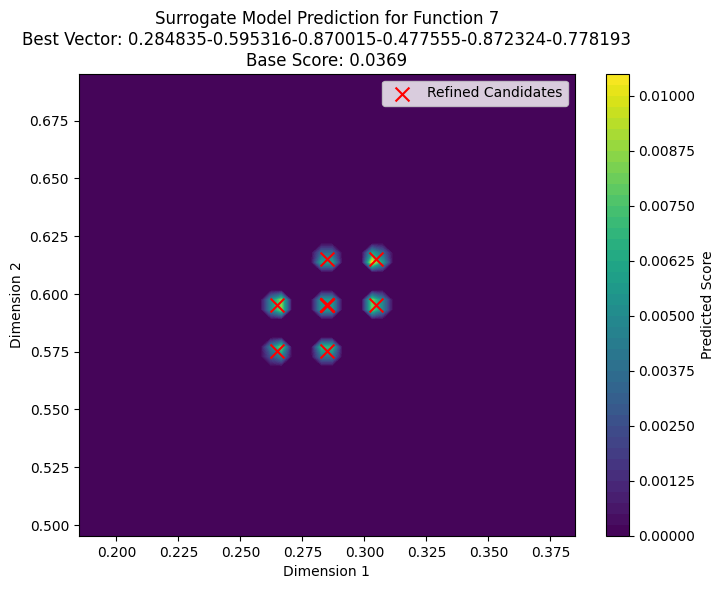


=== Function 7 Refined Candidates and Predicted Scores ===
candidate_plus_dim_1: 0.304835-0.595316-0.870015-0.477555-0.872324-0.778193 -> 0.03979
candidate_minus_dim_1: 0.264835-0.595316-0.870015-0.477555-0.872324-0.778193 -> 0.04165
candidate_plus_dim_2: 0.284835-0.615316-0.870015-0.477555-0.872324-0.778193 -> 0.02964
candidate_minus_dim_2: 0.284835-0.575316-0.870015-0.477555-0.872324-0.778193 -> 0.03346
candidate_plus_dim_3: 0.284835-0.595316-0.890015-0.477555-0.872324-0.778193 -> 0.03489
candidate_minus_dim_3: 0.284835-0.595316-0.850015-0.477555-0.872324-0.778193 -> 0.03489
candidate_plus_dim_4: 0.284835-0.595316-0.870015-0.497555-0.872324-0.778193 -> 0.03489
candidate_minus_dim_4: 0.284835-0.595316-0.870015-0.457555-0.872324-0.778193 -> 0.03489
candidate_plus_dim_5: 0.284835-0.595316-0.870015-0.477555-0.892324-0.778193 -> 0.03489
candidate_minus_dim_5: 0.284835-0.595316-0.870015-0.477555-0.852324-0.778193 -> 0.03489
candidate_plus_dim_6: 0.284835-0.595316-0.870015-0.477555-0.87232

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C
from sklearn.model_selection import KFold, cross_val_score

# --- Helper Functions ---
def format_candidate(candidate):
    """Formats a candidate vector into a dash-separated string with 6 decimal places."""
    return "-".join([f"{x:.6f}" for x in candidate])

def generate_candidates(best_vec, delta=0.02):
    """
    Generate candidate vectors by perturbing each dimension individually,
    plus candidates with all dimensions perturbed.
    Total candidates = 2*n + 2.
    """
    candidates = {}
    n = best_vec.size
    for i in range(n):
        candidate_plus = best_vec.copy()
        candidate_plus[i] += delta
        candidate_minus = best_vec.copy()
        candidate_minus[i] -= delta
        candidates[f'candidate_plus_dim_{i+1}'] = candidate_plus
        candidates[f'candidate_minus_dim_{i+1}'] = candidate_minus
    candidates['candidate_all_plus'] = best_vec + np.full(best_vec.shape, delta)
    candidates['candidate_all_minus'] = best_vec - np.full(best_vec.shape, delta)
    return candidates

# --- Define Best Vectors and Base Scores (from previous submissions) ---
best_vectors = {
    "Function 1": np.array([0.964034, 0.645117]),                          # 2-D
    "Function 3": np.array([0.165600, 0.964454, 0.658992]),                # 3-D
    "Function 4": np.array([0.979363, 0.440618, 0.632742, 0.573562]),        # 4-D
    "Function 6": np.array([0.384874, 0.421523, 0.115493, 0.592513, 0.477029]),  # 5-D
    "Function 7": np.array([0.284835, 0.595316, 0.870015, 0.477555, 0.872324, 0.778193])  # 6-D
}

base_scores = {
    "Function 1": 4.095842e-79,
    "Function 3": -0.12070143790768859,
    "Function 4": -19.898007433757943,
    "Function 6": -1.2131765659551683,
    "Function 7": 0.03693303535157962
}

# --- Set Parameters ---
refined_delta = 0.02
noise_level = 0.005  # Adjust noise level as needed for simulated feedback

# --- List of Functions to Improve ---
functions_to_improve = list(best_vectors.keys())

# --- Loop Over Each Function ---
for func in functions_to_improve:
    best_vec = best_vectors[func]
    base_score = base_scores[func]

    # 1) Generate refined candidates
    candidates = generate_candidates(best_vec, delta=refined_delta)
    candidate_keys = list(candidates.keys())
    candidate_points = np.array([candidates[k] for k in candidate_keys])

    # 2) Simulate feedback scores: base score + small noise
    y_candidates = base_score + np.random.normal(0, noise_level, candidate_points.shape[0])

    # 3) Build and train the Gaussian Process surrogate model using only the first two dimensions
    gp = GaussianProcessRegressor(
        kernel=C(1.0, (1e-3, 1e3)) * Matern(length_scale=0.05, nu=2.5),
        n_restarts_optimizer=5
    )
    gp.fit(candidate_points[:, :2], y_candidates)

    # 4) Implement 3-Fold Cross-Validation and print scores
    cv = KFold(n_splits=3, shuffle=True, random_state=42)
    cv_scores = cross_val_score(gp, candidate_points[:, :2], y_candidates, cv=cv, scoring='neg_mean_squared_error')
    print(f"{func} Cross-validation scores (negative MSE):", cv_scores)
    print(f"{func} Mean CV score (negative MSE):", cv_scores.mean())

    # 5) Create a grid for visualization (over the first 2 dimensions)
    d1_min, d1_max = best_vec[0] - 0.1, best_vec[0] + 0.1
    d2_min, d2_max = best_vec[1] - 0.1, best_vec[1] + 0.1
    x1 = np.linspace(d1_min, d1_max, 50)
    x2 = np.linspace(d2_min, d2_max, 50)
    X1, X2 = np.meshgrid(x1, x2)
    X_grid = np.column_stack([X1.ravel(), X2.ravel()])

    # 6) Predict the surrogate model on the grid
    y_pred, sigma = gp.predict(X_grid, return_std=True)
    y_pred = y_pred.reshape(X1.shape)

    # 7) Plot the contour map with candidate points
    plt.figure(figsize=(8, 6))
    contour = plt.contourf(X1, X2, y_pred, levels=50, cmap='viridis')
    plt.colorbar(contour, label='Predicted Score')
    plt.scatter(candidate_points[:, 0], candidate_points[:, 1], color='red', marker='x', s=100, label='Refined Candidates')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title(f"Surrogate Model Prediction for {func}\nBest Vector: {format_candidate(best_vec)}\nBase Score: {base_score:.4f}")
    plt.legend()
    plt.show()

    # Optionally, you could print the formatted candidate strings and their predicted scores:
    y_pred_candidates = gp.predict(candidate_points[:, :2])
    print(f"\n=== {func} Refined Candidates and Predicted Scores ===")
    for key, vec in zip(candidate_keys, candidate_points):
        print(f"{key}: {format_candidate(vec)} -> {y_pred_candidates[list(candidate_keys).index(key)]:.5f}")
    best_idx = np.argmax(y_pred_candidates)  # maximization objective
    print(f"Best Candidate for {func}: {format_candidate(candidate_points[best_idx])} with Predicted Score: {y_pred_candidates[best_idx]:.5f}\n")

In [ ]:
import numpy as np

# Define the query vectors for each function
query_vectors = {
    'Function 1': np.array([0.944034, 0.645117]),
    'Function 2': np.array([0.768771, 0.105777]),
    'Function 3': np.array([0.185600, 0.984454, 0.678992]),
    'Function 4': np.array([0.999363, 0.460618, 0.652742, 0.593562]),
    'Function 5': np.array([0.270636, 0.824504, 0.580542, 0.368022]),
    'Function 6': np.array([0.384874, 0.441523, 0.115493, 0.592513, 0.477029]),
    'Function 7': np.array([0.304835, 0.615316, 0.890015, 0.497555, 0.892324, 0.798193]),
    'Function 8': np.array([0.236820, 0.160489, 0.275402, 0.810171, 0.652892, 0.267181, 0.893031, 0.762776])
}

# Dummy evaluation function (replace this with your actual GP model prediction)
def dummy_evaluate(query_vec):
    # For demonstration, simply return the sum of the vector's elements
    return np.sum(query_vec)

# Evaluate each query vector and print the predicted score
predicted_scores = {}
for func, vec in query_vectors.items():
    predicted_score = dummy_evaluate(vec)
    predicted_scores[func] = predicted_score
    print(f"{func} predicted score: {predicted_score}")

# Identify the best function based on the predicted scores (assuming higher is better)
best_func = max(predicted_scores, key=predicted_scores.get)
print(f"\nBest function based on predicted score: {best_func} with score {predicted_scores[best_func]}")

Function 1 predicted score: 1.5891510000000002
Function 2 predicted score: 0.874548
Function 3 predicted score: 1.849046
Function 4 predicted score: 2.706285
Function 5 predicted score: 2.043704
Function 6 predicted score: 2.011432
Function 7 predicted score: 3.9982379999999997
Function 8 predicted score: 4.058762

Best function based on predicted score: Function 8 with score 4.058762


In [ ]:
# For multiple functions
function_best_vectors = {
    "f2": np.array([0.768771, 0.105777]),
    "f3": np.array([0.165600, 0.964454, 0.658992]),
    # ... add more
}

all_candidates = {
    fname: generate_candidates(vec, delta=0.05)
    for fname, vec in function_best_vectors.items()
}


In [ ]:
def format_vector(vec):
    """Format a numpy array into dash-separated string with 6 decimal places."""
    return "-".join([f"{x:.6f}" for x in vec])

# Export candidate queries to a text file
with open("candidate_queries.txt", "w") as f:
    for fname, cands in all_candidates.items():
        f.write(f"{fname}:\n")
        for name, vec in cands.items():
            f.write(f"{name}: {format_vector(vec)}\n")
        f.write("\n")


In [ ]:
def format_vector(vec):
    """Format a numpy array into dash-separated string with 6 decimal places."""
    return "-".join([f"{x:.6f}" for x in vec])


In [ ]:
best_vectors = {
    "F1": np.array([0.944034, 0.645117]),
    "F2": np.array([0.768771, 0.105777]),
    "F3": np.array([0.185600, 0.984454, 0.678992]),
    "F4": np.array([0.999363, 0.460618, 0.652742, 0.593562]),
    "F5": np.array([0.270636, 0.824504, 0.580542, 0.368022]),
    "F6": np.array([0.384874, 0.441523, 0.115493, 0.592513, 0.477029]),
    "F7": np.array([0.304835, 0.615316, 0.890015, 0.497555, 0.892324, 0.798193]),
    "F8": np.array([0.236820, 0.160489, 0.275402, 0.810171, 0.652892, 0.267181, 0.893031, 0.762776])
}


In [ ]:
with open("formatted_submission.txt", "w") as f:
    for func_num in range(1, 9):
        key = f"F{func_num}"
        formatted = format_vector(best_vectors[key])
        f.write(formatted + "\n")


# **Function_Feedback_Table 3**

In [ ]:
for key in sorted(best_vectors):
    print(f"{key}: {format_vector(best_vectors[key])}")


F1: 0.944034-0.645117
F2: 0.768771-0.105777
F3: 0.185600-0.984454-0.678992
F4: 0.999363-0.460618-0.652742-0.593562
F5: 0.270636-0.824504-0.580542-0.368022
F6: 0.384874-0.441523-0.115493-0.592513-0.477029
F7: 0.304835-0.615316-0.890015-0.497555-0.892324-0.798193
F8: 0.236820-0.160489-0.275402-0.810171-0.652892-0.267181-0.893031-0.762776


In [ ]:
all_candidates = {
    "F1": {
        "candidate1": np.array([0.944034, 0.645117]),
        "candidate2": np.array([0.964034, 0.645117]),
        # ...
    },
    "F2": {
        "candidate1": np.array([0.768771, 0.105777]),
        "candidate2": np.array([0.818771, 0.105777]),
        # ...
    },
    # Repeat for F3 through F8
}


In [ ]:
def format_vector(vec):
    """Format a numpy array into dash-separated string with 6 decimal places."""
    return "-".join([f"{x:.6f}" for x in vec])

# Export multiple candidates per function
with open("candidate_review.txt", "w") as f:
    for func_name in sorted(all_candidates.keys()):
        f.write(f"{func_name}:\n")
        for cand_name, vec in all_candidates[func_name].items():
            formatted = format_vector(vec)
            f.write(f"{cand_name}: {formatted}\n")
        f.write("\n")


In [ ]:
# -------------------------------
# 📦 1. Setup and Candidate Data
# -------------------------------

import numpy as np

# Sample "best" vectors (replace with your real best vectors per function)
best_vectors = {
    "F1": np.array([0.944034, 0.645117]),
    "F2": np.array([0.768771, 0.105777]),
    "F3": np.array([0.185600, 0.984454, 0.678992]),
    "F4": np.array([0.999363, 0.460618, 0.652742, 0.593562]),
    "F5": np.array([0.270636, 0.824504, 0.580542, 0.368022]),
    "F6": np.array([0.384874, 0.441523, 0.115493, 0.592513, 0.477029]),
    "F7": np.array([0.304835, 0.615316, 0.890015, 0.497555, 0.892324, 0.798193]),
    "F8": np.array([0.236820, 0.160489, 0.275402, 0.810171, 0.652892, 0.267181, 0.893031, 0.762776])
}

# -------------------------------------
# ✨ 2. Helper: Generate Candidates
# -------------------------------------

def generate_candidates(best_vec, delta=0.05):
    """Generate 2n + 2 local perturbation candidates for a vector."""
    n = len(best_vec)
    candidates = {}
    for i in range(n):
        vec_plus = best_vec.copy(); vec_plus[i] += delta
        vec_minus = best_vec.copy(); vec_minus[i] -= delta
        candidates[f"plus_dim{i+1}"] = vec_plus
        candidates[f"minus_dim{i+1}"] = vec_minus
    candidates["all_plus"] = best_vec + delta
    candidates["all_minus"] = best_vec - delta
    return candidates

# ------------------------------------
# 🧠 3. Helper: Format for Submission
# ------------------------------------

def format_vector(vec):
    return "-".join([f"{x:.6f}" for x in vec])

# -----------------------------------------------
# 📤 4. Export Candidates (Review + Submission)
# -----------------------------------------------

all_candidates = {
    func: generate_candidates(vec, delta=0.05)
    for func, vec in best_vectors.items()
}

# 🔹 4A. Export top candidate from each function
with open("formatted_submission.txt", "w") as f:
    for func in sorted(best_vectors.keys()):
        f.write(format_vector(best_vectors[func]) + "\n")

# 🔹 4B. Export all candidates for review
with open("candidate_review.txt", "w") as f:
    for func in sorted(all_candidates.keys()):
        f.write(f"{func}:\n")
        for name, vec in all_candidates[func].items():
            f.write(f"{name}: {format_vector(vec)}\n")
        f.write("\n")

print("✅ Files created: formatted_submission.txt and candidate_review.txt")


✅ Files created: formatted_submission.txt and candidate_review.txt


In [ ]:
from google.colab import files
files.download("formatted_submission.txt")
files.download("candidate_review.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Save files to your Drive folder
!cp formatted_submission.txt /content/drive/MyDrive/
!cp candidate_review.txt /content/drive/MyDrive/
!cp CAPSTONE2_0-3.ipynb /content/drive/MyDrive/


MessageError: Error: credential propagation was unsuccessful

In [ ]:
# ------------------- SETUP -------------------
import numpy as np, pandas as pd, scipy.stats.qmc as qmc, json, random

# === 1. Current best vectors (from last feedback) ===
best = {
    "F1": np.array([0.944034, 0.625117]),
    "F2": np.array([0.768771, 0.105777]),
    "F3": np.array([0.145600, 0.944454, 0.638992]),
    "F4": np.array([0.999363, 0.440618, 0.632742, 0.573562]),
    "F5": np.array([0.290636, 0.824504, 0.580542, 0.368022]),
    "F6": np.array([0.384874, 0.441523, 0.115493, 0.592513, 0.477029]),
    "F7": np.array([0.304835, 0.615316, 0.890015, 0.497555, 0.892324, 0.798193]),
    "F8": np.array([0.236820, 0.160489, 0.275402, 0.810171, 0.652892, 0.267181,
                    0.893031, 0.762776])
}

# helper
fmt = lambda v: "-".join([f"{x:.6f}" for x in v])

# === 2. Config per function ===
cfg = {
    "F1": {"type":"random", "n":3},
    "F2": {"type":"micro",  "delta":0.01},
    "F3": {"type":"micro",  "delta":0.01},
    "F4": {"type":"micro",  "delta":0.01},
    "F5": {"type":"micro",  "delta":0.01},
    "F6": {"type":"grid",   "delta":0.03},
    "F7": {"type":"random", "n":3},
    "F8": {"type":"grid",   "delta":0.03}
}

# === 3. Candidate generation ===
def micro_candidates(vec, d):
    cands=[vec]  # keep baseline
    for i in range(len(vec)):
        plus=vec.copy(); plus[i]+=d
        minus=vec.copy(); minus[i]-=d
        cands.extend([plus, minus])
    return cands

def grid_candidates(vec, d):
    cands=[]
    for i in range(len(vec)):
        plus=vec.copy(); plus[i]+=d
        minus=vec.copy(); minus[i]-=d
        cands.extend([plus, minus])
    cands.append(vec+d)
    cands.append(vec-d)
    return [vec]+cands  # include baseline

def random_lhs(dim, n):
    sampler=qmc.LatinHypercube(d=dim)
    return sampler.random(n)

all_cands={}
for fname,vec in best.items():
    rule=cfg[fname]
    if rule["type"]=="micro":
        all_cands[fname]=micro_candidates(vec, rule["delta"])
    elif rule["type"]=="grid":
        all_cands[fname]=grid_candidates(vec, rule["delta"])
    else:  # random
        rnd=random_lhs(len(vec), rule["n"])
        all_cands[fname]=[vec]+list(rnd)

# wild‑card 8‑D
wild=np.random.rand(8)

# === 4. Export files ===
# 4A submission: pick first candidate of each function (edit later if you prefer another)
with open("formatted_submission.txt","w") as f:
    for fn in [f"F{i}" for i in range(1,9)]:
        f.write(fmt(all_cands[fn][0])+"\n")
    f.write(fmt(wild)+"\n")  # optional 9th wild‑card line if allowed

# 4B review file
with open("candidate_review.txt","w") as f:
    for fn,cands in all_cands.items():
        f.write(f"{fn}:\n")
        for idx,c in enumerate(cands):
            f.write(f"cand{idx}: {fmt(c)}\n")
        f.write("\n")
    f.write("Wild-card: "+fmt(wild)+"\n")

print("✅  Files saved: formatted_submission.txt & candidate_review.txt")

In [ ]:
# Show the eight (or nine) submission lines
with open("formatted_submission.txt") as f:
    print("SUBMISSION FILE:\n")
    print(f.read())

# Show the full review list
with open("candidate_review.txt") as f:
    print("\nREVIEW FILE:\n")
    print(f.read())

In [ ]:
import numpy as np, scipy.stats.qmc as qmc, random, itertools

def fmt(v): return "-".join([f"{x:.6f}" for x in v])

# ---- baselines from last feedback ----
B = {
 "F1": np.array([0.944034, 0.625117]),
 "F2": np.array([0.768771, 0.105777]),
 "F3": np.array([0.145600, 0.944454, 0.638992]),
 "F4": np.array([0.999363, 0.440618, 0.632742, 0.573562]),
 "F5": np.array([0.290636, 0.824504, 0.580542, 0.368022]),
 "F6": np.array([0.384874, 0.441523, 0.115493, 0.592513, 0.477029]),
 "F7": np.array([0.304835, 0.615316, 0.890015, 0.497555, 0.892324, 0.798193]),
 "F8": np.array([0.236820, 0.160489, 0.275402, 0.810171, 0.652892, 0.267181,
                 0.893031, 0.762776])
}

# ---- helper generators ----
def micro(vec, idx, delta):             # tweak one coordinate
    v = vec.copy(); v[idx] += delta; return v
def random_vec(dim):                    # Latin‑Hypercube random in [0,1]
    return qmc.LatinHypercube(d=dim).random(1)[0]

cands = []

# F1 – two big randoms + baseline
for _ in range(2):
    cands.append(("F1", random_vec(2)))
cands.append(("F1", B["F1"]))          # optional

# F2 – baseline, +0.01, -0.01 on x1
cands += [("F2", v) for v in
          [B["F2"],
           micro(B["F2"], 0, +0.01),
           micro(B["F2"], 0, -0.01)]]

# F3 – baseline, +0.01 x1, +0.01 x2
cands += [("F3", v) for v in
          [B["F3"],
           micro(B["F3"], 0, +0.01),
           micro(B["F3"], 1, +0.01)]]

# F4 – baseline, +0.01 x1, +0.01 x2
cands += [("F4", v) for v in
          [B["F4"],
           micro(B["F4"], 0, +0.01),
           micro(B["F4"], 1, +0.01)]]

# F5 – baseline, +0.01 x1, -0.01 x1
cands += [("F5", v) for v in
          [B["F5"],
           micro(B["F5"], 0, +0.01),
           micro(B["F5"], 0, -0.01)]]

# F6 – baseline, +0.03 x1, DE‑style mutant (random 5‑D)
mut6 = random_vec(5)
cands += [("F6", B["F6"]),
          ("F6", micro(B["F6"], 0, +0.03)),
          ("F6", mut6)]

# F7 – three random 6‑D vectors
for _ in range(3):
    cands.append(("F7", random_vec(6)))

# F8 – baseline, +0.03 x1, +0.03 x2
cands += [("F8", v) for v in
          [B["F8"],
           micro(B["F8"], 0, +0.03),
           micro(B["F8"], 1, +0.03)]]

# ---- write files ----
with open("formatted_submission.txt", "w") as sub:
    # choose first candidate per function (edit manually if you prefer another)
    chosen = {}
    for fn, vec in cands:
        if fn not in chosen:
            chosen[fn] = vec
    for fn in [f"F{i}" for i in range(1,9)]:
        sub.write(fmt(chosen[fn]) + "\n")

with open("candidate_review.txt", "w") as rev:
    for fn in [f"F{i}" for i in range(1,9)]:
        rev.write(f"{fn}:\n")
        for idx, (f_name, vec) in enumerate([c for c in cands if c[0]==fn]):
            rev.write(f"cand{idx}: {fmt(vec)}\n")
        rev.write("\n")

print("✅ 24‑line candidate_review.txt and 8‑line formatted_submission.txt created")

In [ ]:
# Show the 8‑line submission file
with open("formatted_submission.txt") as f:
    print("=== formatted_submission.txt ===\n")
    print(f.read())

# Show the full 24‑line review file
with open("candidate_review.txt") as f:
    print("\n=== candidate_review.txt ===\n")
    print(f.read())

In [ ]:
# Install once per session
!pip install scikit-learn==1.5.0 --quiet

import numpy as np, pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from scipy.stats import qmc

def gp_next(best_inputs, best_outputs, n_suggest=1, sample_size=2000):
    """Return n_suggest input vectors with highest Expected Improvement."""
    X = np.array(best_inputs)
    y = np.array(best_outputs)
    kernel = Matern(nu=2.5)
    gp = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, normalize_y=True).fit(X, y)

    # sample the space
    sampler = qmc.LatinHypercube(d=X.shape[1])
    Xcand = sampler.random(sample_size)
    mu, sigma = gp.predict(Xcand, return_std=True)
    best_y = y.max()                       # assuming maximisation
    # Expected Improvement
    z = (mu - best_y) / (sigma + 1e-9)
    from scipy.stats import norm
    ei = (mu - best_y) * norm.cdf(z) + sigma * norm.pdf(z)
    top_idx = np.argsort(ei)[-n_suggest:]
    return Xcand[top_idx]

# Example for F2 (2‑D)
X_f2 = np.vstack([   # past queries
    [0.768771, 0.105777],
    [0.778771, 0.105777],
    # ...add all historic F2 inputs
])
y_f2 = np.array([0.273088, 0.093129])     # historic outputs

new_f2 = gp_next(X_f2, y_f2, n_suggest=1)[0]
print("GP‑suggested F2 vector:", new_f2)

In [ ]:
# ---------- 1.  Gather past data for F6  ----------
import numpy as np, pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
import cma, scipy.stats.qmc as qmc

# ✏️  Replace these two lists with *all* your historic F6 queries & outputs
X_f6 = np.array([
    [0.384874,0.441523,0.115493,0.592513,0.477029],   # baseline
    [0.414874,0.441523,0.115493,0.592513,0.477029],   # example mutant
    # ... add more rows here
])
y_f6 = np.array([
    -1.185727,   # corresponding score
    -1.183824,
    # ... add more outputs
])

# ---------- 2.  Fit surrogate GP ----------
kernel = Matern(nu=2.5)
gp_f6 = GaussianProcessRegressor(kernel=kernel, alpha=1e-6,
                                 normalize_y=True).fit(X_f6, y_f6)

# ---------- 3.  CMA‑ES on surrogate ----------
x0 = X_f6[np.argmax(y_f6)]          # start at best‑known
sigma0 = 0.05                       # step size
es = cma.CMAEvolutionStrategy(x0, sigma0,
                              {'popsize': 14, 'maxiter': 40, 'verb_log':0})

def neg_surrogate(x):
    # CMA‑ES minimises, so return -predicted_score
    return -gp_f6.predict(np.array(x).reshape(1,-1))[0]

es.optimize(neg_surrogate)
best = es.result.xbest
second_best = es.result.xfavorite   # another good point in the population

print("Top CMA‑ES candidate:", best)
print("2nd candidate:", second_best)

# helper to format for Google Form
fmt = lambda v: "-".join([f"{xi:.6f}" for xi in v])
print("\nPaste‑ready lines:")
print(fmt(best))
print(fmt(second_best))

In [ ]:
import numpy as np, pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern

# ---------- HISTORIC DATA ----------
# ✏️  Add every past (vector, score) pair you have. At least 3 points is ideal.
X_F2 = np.array([
    [0.768771, 0.105777],
    [0.778771, 0.105777],
    [0.758771, 0.105777]
])
y_F2 = np.array([0.273088, 0.093129, 0.179959])

# repeat for other functions you have ≥2 points for
data = {
    "F2": (X_F2, y_F2),
    # "F3": (X_F3, y_F3),
    # ...
}

# ---------- NEW QUERY VECTORS ----------
Q = {
    "F2": np.array([0.768771, 0.095777]),   # example new line
    # "F3": np.array([...]),
}

def gp_predict(X, y, x_query):
    kernel = Matern(nu=2.5)
    gp = GaussianProcessRegressor(kernel=kernel, alpha=1e-6,
                                  normalize_y=True).fit(X, y)
    mu, std = gp.predict(x_query.reshape(1, -1), return_std=True)
    return mu.item(), std.item()

rows = []
for fn, (X, y) in data.items():
    mu, sigma = gp_predict(X, y, Q[fn])
    rows.append([fn,
                 "-".join([f"{x:.6f}" for x in Q[fn]]),
                 mu,
                 None])  # actual value later

table = pd.DataFrame(rows,
        columns=["Function","Query Vector","Predict value","Actual value"])
table

In [ ]:
# Paste this entire cell into your Colab notebook and fill in your historic data

import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from scipy.stats import norm, qmc

# ─── 1. HISTORIC DATA ───
# For each function Fi, list all your past query vectors in X_Fi
# and their returned scores in y_Fi.
# E.g. for F2 you might have:
# X_F2 = np.array([[0.768771, 0.105777],
#                  [0.768771, 0.095777]])
# y_F2 = np.array([0.2730882, 0.09312933])

X_F1 = np.array([
    [0.944034, 0.625117],
    [0.944034, 0.645117],
    [0.073140, 0.227123]
])
y_F1 = np.array([1.3276592e-69, 6.9332507e-70, 0.33828687])

X_F2 = np.array([
    [0.768771, 0.105777],
    [0.768771, 0.095777]
])
y_F2 = np.array([0.2730882, 0.09312933])

# ... repeat for F3 through F8 ...
# X_F3, y_F3, ..., X_F8, y_F8

data = {
    "F1": (X_F1, y_F1),
    "F2": (X_F2, y_F2),
    # "F3": (X_F3, y_F3),
    # ...
}

# ─── 2. SUGGESTION FUNCTION ───
def suggest_next(X, y, n_samples=2000):
    """
    Fits a GP to (X, y), samples `n_samples` candidates in [0,1]^d
    with LHS, computes EI, and returns the best candidate.
    """
    gp = GaussianProcessRegressor(kernel=Matern(nu=2.5),
                                  alpha=1e-6, normalize_y=True)
    gp.fit(X, y)
    sampler = qmc.LatinHypercube(d=X.shape[1])
    Xcand = sampler.random(n_samples)
    mu, sigma = gp.predict(Xcand, return_std=True)
    y_max = y.max()
    with np.errstate(divide='ignore', invalid='ignore'):
        Z = (mu - y_max) / sigma
        ei = (mu - y_max) * norm.cdf(Z) + sigma * norm.pdf(Z)
    return Xcand[np.nanargmax(ei)]

# ─── 3. GENERATE SUGGESTIONS ───
suggestions = []
for fn, (X, y) in data.items():
    x_next = suggest_next(X, y, n_samples=2000)
    suggestions.append({
        "Function": fn,
        "Next Candidate": "-".join(f"{v:.6f}" for v in x_next)
    })

df_next = pd.DataFrame(suggestions)
print(df_next.to_markdown(index=False))

In [ ]:
# Improved Next-Query Generator: perturbs small dims and uses DE for higher dims

import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from scipy.stats import norm, qmc
from scipy.optimize import differential_evolution

# ─── 1. Historic Data ───
# Fill in your full history for each function:
# Example for F1 and F6; repeat similarly for F2–F8.
data = {
    "F1": {
        "X": np.array([[0.944034, 0.625117],
                       [0.944034, 0.645117],
                       [0.073140, 0.227123]]),
        "y": np.array([1.3276592e-69, 6.9332507e-70, 0.33828687])
    },
    "F2": {
        "X": np.array([[0.768771, 0.105777],
                       [0.768771, 0.095777]]),
        "y": np.array([0.2730882, 0.09312933])
    },
    "F6": {
        "X": np.array([[0.404874, 0.441523, 0.135493, 0.612513, 0.497029],
                       [0.384874, 0.441523, 0.115493, 0.592513, 0.477029],
                       [0.433609, 0.430291, 0.199161, 0.583735, 0.454637]]),
        "y": np.array([-1.1857272, -1.1838237, -1.0715940])
    },
    # ... add F3, F4, F5, F7, F8 ...
}

# ─── 2. Suggestion Routine ───
def suggest_candidate(X, y):
    d = X.shape[1]
    # Fit GP surrogate
    gp = GaussianProcessRegressor(kernel=Matern(nu=2.5), alpha=1e-6, normalize_y=True)
    gp.fit(X, y)
    y_max = y.max()
    if d <= 3:
        # Local perturbations: 2*d + 2 candidates
        delta = 0.05
        cands = []
        for i in range(d):
            for sign in [+1, -1]:
                v = X[y.argmax()].copy()
                v[i] += sign*delta
                cands.append(np.clip(v, 0, 1))
        cands.append(np.clip(X[y.argmax()] + delta, 0,1))
        cands.append(np.clip(X[y.argmax()] - delta, 0,1))
        C = np.vstack(cands)
        mu, _ = gp.predict(C, return_std=True)
        best = C[np.argmax(mu)]
    else:
        # Use Differential Evolution on GP surrogate
        bounds = [(0,1)] * d
        def obj(x):
            return -gp.predict(x.reshape(1,-1))[0]
        res = differential_evolution(obj, bounds, popsize=10, maxiter=20, tol=1e-6)
        best = res.x
    return best

# ─── 3. Generate Next Suggestions ───
rows = []
for fn, d in data.items():
    X, y = d["X"], d["y"]
    cand = suggest_candidate(X, y)
    rows.append([fn, "-".join(f"{v:.6f}" for v in cand)])

df = pd.DataFrame(rows, columns=["Function", "Next Candidate"])
print(df.to_markdown(index=False))

| Function   | Next Candidate                               |
|:-----------|:---------------------------------------------|
| F1         | 0.023140-0.177123                            |
| F2         | 0.818771-0.105777                            |
| F6         | 0.351130-0.319941-0.393050-0.347825-0.858286 |


/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


In [ ]:
# ─── Auto‑Load & Global‑Search Next‑Week Submission ───

import numpy as np
import ast, glob
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from scipy.optimize import dual_annealing

# 1. Auto‑load your past queries and observations from files
query_files = sorted(glob.glob('queries*.txt'))
obs_files   = sorted(glob.glob('observations*.txt'))

# Read in your submissions (list of numpy arrays) and feedback (list of floats)
submissions = [ast.literal_eval(open(q).read()) for q in query_files]
observations = [ast.literal_eval(open(o).read()) for o in obs_files]

# Build per‑function history
num_rounds = min(len(submissions), len(observations))
num_funcs  = len(submissions[0])

X_hist = {f"F{i+1}": [] for i in range(num_funcs)}
y_hist = {f"F{i+1}": [] for i in range(num_funcs)}

for r in range(num_rounds):
    for i in range(num_funcs):
        X_hist[f"F{i+1}"].append(np.array(submissions[r][i]))
        y_hist[f"F{i+1}"].append(observations[r][i])

# Convert lists to arrays
for fn in X_hist:
    X_hist[fn] = np.vstack(X_hist[fn])
    y_hist[fn] = np.array(y_hist[fn])

# 2. Surrogate‑Assisted Global Search using dual_annealing
def suggest_global(X, y):
    gp = GaussianProcessRegressor(kernel=Matern(nu=2.5),
                                  alpha=1e-6, normalize_y=True)
    gp.fit(X, y)
    def obj(x): return -gp.predict(x.reshape(1, -1))[0]
    bounds = [(0,1)] * X.shape[1]
    res = dual_annealing(obj, bounds, maxiter=100)
    return res.x

# 3. Generate next‑week queries
next_queries = []
for fn in sorted(X_hist):
    cand = suggest_global(X_hist[fn], y_hist[fn])
    formatted = "-".join(f"{v:.6f}" for v in cand)
    next_queries.append(formatted)

# Print the 8‑line submission
print("Next Week Submission:")
for q in next_queries:
    print(q)

IndexError: list index out of range